# EE782 Assignment 2
## Kaishva Chintan Shah (200020066)

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import random
import torch
import cv2

In [31]:
# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")  # Use the GPU
    print("Using GPU:", torch.cuda.get_device_name(0))  # Display GPU name
else:
    device = torch.device("cpu")  # Use the CPU
    print("CUDA is not available. Using CPU.")

Using GPU: NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [32]:
import os
import itertools
import cv2

# Specify the path to the "train" folder containing subfolders
train_folder = r'./train'
val_folder = r'./validation'
test_folder = r'./test'

# Function to load and label images from a subfolder
def load_and_label_images(folder_path):
    # Lists to store image paths and labels
    images = []
    labels = []

    # Extract the name of the current subfolder
    folder_name = os.path.basename(folder_path)

    # Iterate through files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Consider other image formats if needed
            img_path = os.path.join(folder_path, filename)
            images.append(img_path)  # Add image path to the list
            labels.append(folder_name)  # Assign the folder name as the label

    return images, labels

# Initialize lists for storing image paths and labels
train_images_paths = []
train_labels_name = []
val_images_paths = []
val_labels_name = []
test_images_paths = []
test_labels_name = []

In [33]:
# Load images and labels from subfolders in the "train" directory
train_subfolders = os.listdir(train_folder)

# Iterate through subfolders in the "train" directory
for subfolder in train_subfolders:
    subfolder_path = os.path.join(train_folder, subfolder)

    # Check if the subfolder is a directory
    if os.path.isdir(subfolder_path):
        # Use the "load_and_label_images" function to load images and their labels
        images, labels = load_and_label_images(subfolder_path)

        # Extend the lists with image paths and corresponding labels
        train_images_paths.extend(images)
        train_labels_name.extend(labels)

# The code above loads and labels images from subfolders within the "train" directory.
# It iterates through each subfolder, loads the images within it, and associates them
# with their corresponding folder names as labels.

# The commented code below would display the first 5 loaded images along with their labels.
# For each image, it uses the OpenCV library to read and display the image. However, this part
# is currently commented out and is not executed.
# for img_path, label in zip(train_images_paths[:5], train_labels_name[:5]):
#     img = cv2.imread(img_path)
#     cv2_imshow(img)  # Display the image
#     cv2.waitKey(0)  # Wait for a key press to move to the next image

# Close all displayed image windows
cv2.destroyAllWindows()


In [34]:
# Load images and labels from subfolders in the "validation" directory
val_subfolders = os.listdir(val_folder)

# Iterate through subfolders in the "validation" directory
for subfolder in val_subfolders:
    subfolder_path = os.path.join(val_folder, subfolder)

    # Check if the subfolder is a directory
    if os.path.isdir(subfolder_path):
        # Use the "load_and_label_images" function to load images and their labels
        images, labels = load_and_label_images(subfolder_path)

        # Extend the lists with image paths and corresponding labels
        val_images_paths.extend(images)
        val_labels_name.extend(labels)

# The code above loads and labels images from subfolders within the "validation" directory.
# It iterates through each subfolder, loads the images within it, and associates them
# with their corresponding folder names as labels.

# The commented code below would display the first 5 loaded images along with their labels.
# For each image, it uses the OpenCV library to read and display the image. However, this part
# is currently commented out and is not executed.
# for img_path, label in zip(val_images_paths[:5], val_labels_name[:5]):
#     img = cv2.imread(img_path)
#     cv2_imshow(img)  # Display the image
#     cv2.waitKey(0)  # Wait for a key press to move to the next image

# Close all displayed image windows
cv2.destroyAllWindows()


In [37]:
# Load images and labels from subfolders in the "test" directory
test_subfolders = os.listdir(test_folder)

# Iterate through subfolders in the "test" directory
for subfolder in test_subfolders:
    subfolder_path = os.path.join(test_folder, subfolder)

    # Check if the subfolder is a directory
    if os.path.isdir(subfolder_path):
        # Use the "load_and_label_images" function to load images and their labels
        images, labels = load_and_label_images(subfolder_path)

        # Extend the lists with image paths and corresponding labels
        test_images_paths.extend(images)
        test_labels_name.extend(labels)

# The code above loads and labels images from subfolders within the "test" directory.
# It iterates through each subfolder, loads the images within it, and associates them
# with their corresponding folder names as labels.

# The commented code below would display the first 5 loaded images along with their labels.
# For each image, it uses the OpenCV library to read and display the image. However, this part
# is currently commented out and is not executed.
# for img_path, label in zip(test_images_paths[:5], test_labels_name[:5]):
#     img = cv2.imread(img_path)
#     cv2_imshow(img)  # Display the image
#     cv2.waitKey(0)  # Wait for a key press to move to the next image

# Close all displayed image windows
cv2.destroyAllWindows()


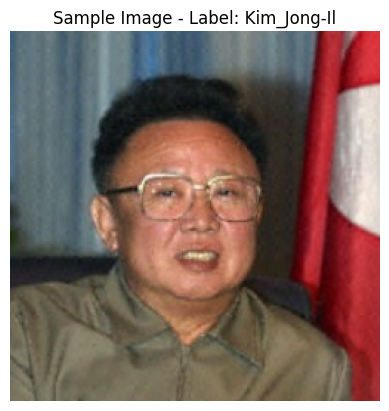

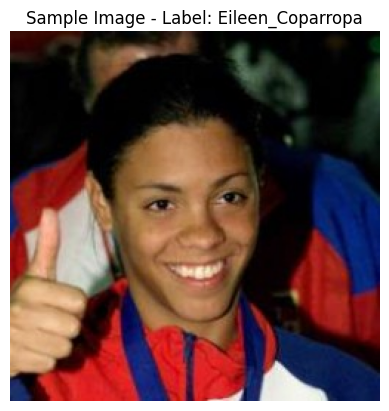

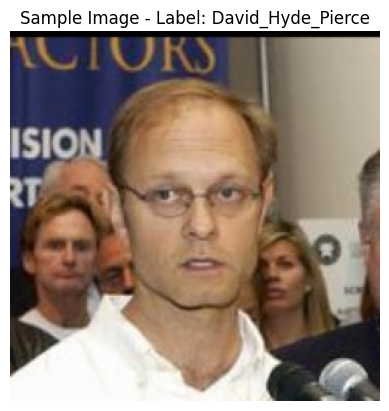

In [38]:
import cv2
import torch
import random
import matplotlib.pyplot as plt

# Function to preprocess and load images
def preprocess_and_load_images(image_paths, min_size=(224, 224)):
    images = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

        # Resize the image to meet the minimum size requirement
        if image.shape[0] < min_size[0] or image.shape[1] < min_size[1]:
            image = cv2.resize(image, min_size, interpolation=cv2.INTER_CUBIC)

        images.append(image)
    return images

# Ensure train_labels has the same length as train_images
# assert len(train_labels) == len(train_images), "Length of train_labels should match train_images."

# Load and preprocess images
train_images = preprocess_and_load_images(train_images_paths)
val_images = preprocess_and_load_images(val_images_paths)
test_images = preprocess_and_load_images(test_images_paths)

# Display a few sample images
sample_indices = random.sample(range(len(train_images)), 3)  # Adjust the number of samples as needed
for idx in sample_indices:
    plt.imshow(train_images[idx])
    plt.title(f"Sample Image - Label: {train_labels_name[idx]}")
    plt.axis('off')
    plt.show()

In [39]:
import cv2
import torch
import random
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms

# Function to create pairs and labels while randomly selecting a subset
def create_random_pairs_and_labels(images, labels, num_positive_pairs_to_select = 1000, num_negative_pairs_to_select = 1000):
    num_samples = len(images)
    pairs = []
    label_list = []

    while(num_positive_pairs_to_select):
        # Randomly select two different samples
        i, j = random.sample(range(num_samples), 2)
        pair = [images[i], images[j]]
        same_class = (labels[i] == labels[j])
        label = 1 if same_class else 0
        if(label == 1):
            pairs.append(pair)
            label_list.append(label)
            num_positive_pairs_to_select -= 1

    while(num_negative_pairs_to_select):
        # Randomly select two different samples
        i, j = random.sample(range(num_samples), 2)
        pair = [images[i], images[j]]
        same_class = (labels[i] == labels[j])
        label = 1 if same_class else 0
        if(label == 0):
            pairs.append(pair)
            label_list.append(label)
            num_negative_pairs_to_select -= 1

    # Reshape pairs to (num_pairs, 2, channels, height, width)
    # (Note: The original code is commented out as it's not necessary)
    # pairs = np.array(pairs).reshape(-1, 2, *pairs[0][0].shape)
    return pairs, label_list

# Specify the number of random pairs to select
num_random_pairs = 10000  # Adjust as needed

# Create random pairs and labels for training, validation, and testing
train_pairs, train_labels = create_random_pairs_and_labels(train_images, train_labels_name, num_positive_pairs_to_select = 3000, num_negative_pairs_to_select = 3000)
val_pairs, val_labels = create_random_pairs_and_labels(val_images, val_labels_name, num_positive_pairs_to_select = 500, num_negative_pairs_to_select = 500)
test_pairs, test_labels = create_random_pairs_and_labels(test_images, test_labels_name, num_positive_pairs_to_select = 500, num_negative_pairs_to_select = 500)

# Print the shape of the training pairs
print(np.array(train_pairs).shape)

# Define a custom dataset class
class SiameseDataset(Dataset):
    def __init__(self, pairs, labels, transform=None):
        self.pairs = pairs
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        image_pair = self.pairs[idx]
        label = self.labels[idx]

        if self.transform:
            image_pair = [self.transform(image) for image in image_pair]

        # Stack and permute the dimensions to have the desired order
        # (Note: The code for stacking and permuting is commented out as it's not necessary)
        # image_pair = torch.stack(image_pair).permute(1, 0, 2, 3, 4)
        return image_pair, label

# Define transformations for the images (resize and convert to tensor)
transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert to PIL image
    transforms.Resize((224, 224)),  # Resize to a consistent size
    transforms.ToTensor(),  # Convert to PyTorch tensor
])

# Create datasets and data loaders for training, validation, and testing
train_dataset = SiameseDataset(train_pairs, train_labels, transform=transform)
val_dataset = SiameseDataset(val_pairs, val_labels, transform=transform)
test_dataset = SiameseDataset(test_pairs, test_labels, transform=transform)

# Print the length of the training dataset
print("Number of samples in train_dataset:", len(train_dataset))

# Print the shape of the first data point (image_pair)
sample_data_point, label = train_dataset[0]
print("Shape of the first data point (image_pair):", len(sample_data_point), sample_data_point[0].shape)

batch_size = 16  # Adjust batch size as needed
# Create data loaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


(6000, 2, 250, 250, 3)
Number of samples in train_dataset: 6000
Shape of the first data point (image_pair): 2 torch.Size([3, 224, 224])


In [10]:
import torch

# Iterate through the train_loader to get the size of the first batch
for batch_data, batch_labels in train_loader:
    # Convert the batch data to a tensor
    batch_data = torch.stack(batch_data).permute(1, 0, 2, 3, 4)
    
    # Shape of the batch data (batch_size, channels, height, width)
    batch_shape = batch_data.shape
    print("Shape of a batch in train_loader:", batch_shape)
    
    print("Shape of labels:", batch_labels.size())
    
    break  # Break after the first batch


Shape of a batch in train_loader: torch.Size([16, 2, 3, 224, 224])
Shape of labels: torch.Size([16])


Shape of a batch in train_loader: torch.Size([16, 2, 3, 224, 224])
Shape of labels: torch.Size([16])


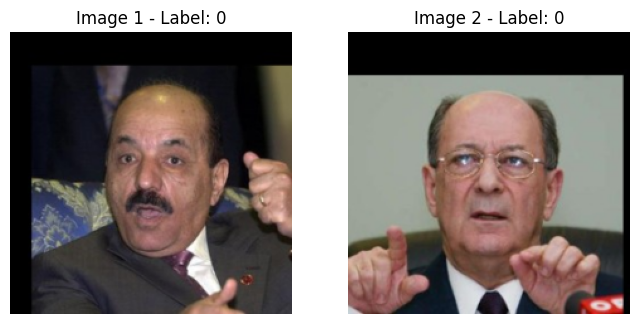

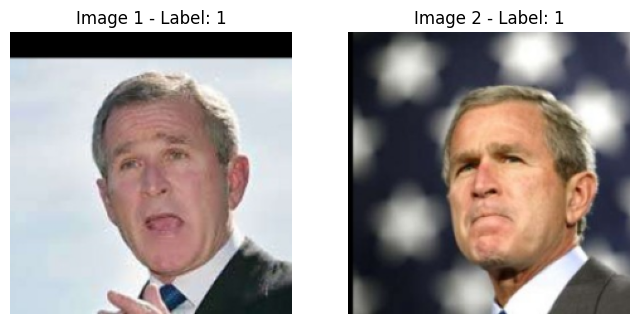

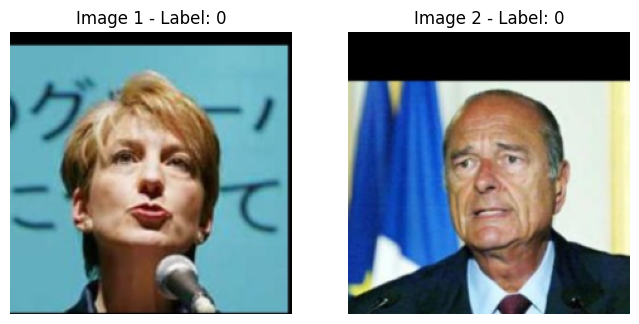

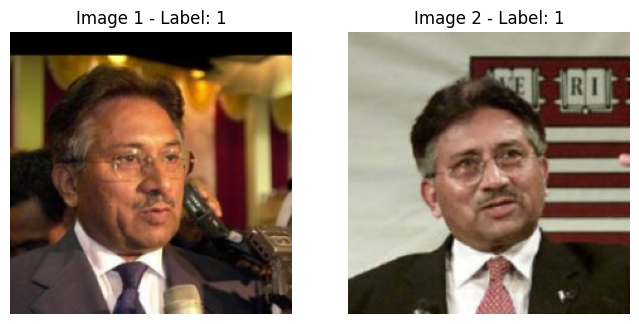

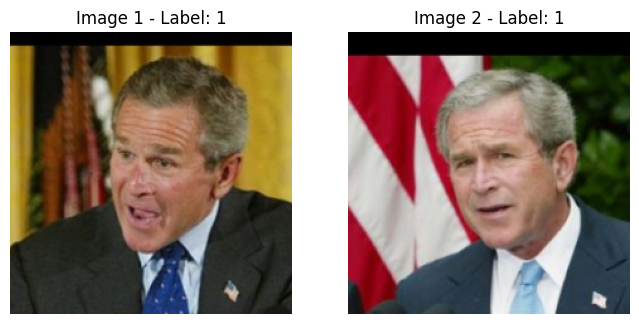

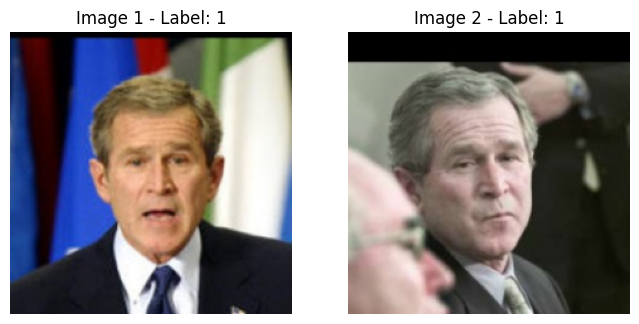

In [12]:
# Iterate through the train_loader to get the size of all batches
for batch_data, batch_labels in train_loader:
    # Convert the batch data to a tensor
    batch_data = torch.stack(batch_data).permute(1, 0, 2, 3, 4)
    
    # Shape of the batch data (batch_size, channels, height, width)
    batch_shape = batch_data.shape
    print("Shape of a batch in train_loader:", batch_shape)
    
    print("Shape of labels:", batch_labels.size())
    
    # Extract images and labels from the batch
    images, labels = batch_data, batch_labels
    
    # Plot a few sample image pairs
    sample_indices = random.sample(range(len(images)), 6)  # Adjust the number of samples as needed
    for idx in sample_indices:
        image_pair = images[idx]
        label = labels[idx]

        plt.figure(figsize=(8, 4))

        # Plot the first image in the pair
        plt.subplot(1, 2, 1)
        plt.imshow(image_pair[0].permute(1, 2, 0))  # Reverse the image transformation
        plt.title(f"Image 1 - Label: {label.item()}")
        plt.axis('off')

        # Plot the second image in the pair
        plt.subplot(1, 2, 2)
        plt.imshow(image_pair[1].permute(1, 2, 0))  # Reverse the image transformation
        plt.title(f"Image 2 - Label: {label.item()}")
        plt.axis('off')

        plt.show()

    break
# This loop will go through all batches in the train_loader


# Siamese Network for Image Embeddings

In this code, we define a Siamese Network using PyTorch. A Siamese Network is a neural architecture designed for learning similarity between pairs of data points. In this case, it is used for image similarity learning.

## Importing Libraries

We start by importing the necessary PyTorch libraries and modules.

## `get_backbone_out_features` Function

A utility function is defined to determine the output features based on the chosen backbone network. This is important because different backbones have different output dimensions.

## `SiameseNetwork` Class

This is the main class that defines the Siamese Network.

### Constructor

- The constructor (`__init__`) takes two main parameters: `backbone` and `embedding_size`.
- `backbone` is the name of the neural network backbone (e.g., "resnet18").
- `embedding_size` is the dimensionality of the output embeddings.

### Backbone Initialization

- The code checks if the specified `backbone` exists in `torchvision.models`. If it doesn't, an exception is raised.
- The specified backbone model is created and pre-trained weights are loaded.
- The classification head of the backbone is removed, leaving the feature extraction part.
- Adaptive average pooling is applied to ensure that the feature maps have a consistent size.

### Embedding Layer

- A fully connected layer is added to generate embeddings of size `embedding_size`.
- A Leaky ReLU activation is applied after the linear layer.

### `forward_one` Method

- This method processes a single input image through one branch of the Siamese Network.
- It passes the image through the backbone, applies adaptive pooling, and generates embeddings.

### `forward` Method

- This method is used for processing two input images (image pairs).
- It calls `forward_one` for each image in the pair.
- The output is a pair of embeddings, one for each input image.

This Siamese Network is designed for various similarity-based tasks, where the goal is to learn embeddings that represent the similarity or dissimilarity between input pairs. It's a powerful architecture for tasks such as face recognition, object tracking, and image similarity learning.


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

def get_backbone_out_features(backbone):
    if 'resnet' in backbone:
        return 512  # Output features for ResNet backbones
    elif 'densenet' in backbone:
        return 1024  # Output features for DenseNet backbones
    else:
        raise ValueError("Unsupported backbone: {}".format(backbone))

class SiameseNetwork(nn.Module):
    def __init__(self, backbone="resnet18", embedding_size=64):
        '''
        Creates a siamese network with a network from torchvision.models as backbone.

        Parameters:
                backbone (str): Options of the backbone networks can be found at https://pytorch.org/vision/stable/models.html
                embedding_size (int): Size of the output embedding vector.
        '''

        super().__init__()

        if backbone not in models.__dict__:
            raise Exception("No model named {} exists in torchvision.models.".format(backbone))

        # Create a backbone network from the pretrained models provided in torchvision.models
        self.backbone = models.__dict__[backbone](pretrained=True, progress=True)

        # Remove the classification head of the backbone network
        self.backbone = nn.Sequential(*list(self.backbone.children())[:-2])

        # Adaptive pooling to ensure consistent feature map size
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layer to generate embeddings
        out_features = get_backbone_out_features(backbone)
        self.embedding_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(out_features, embedding_size),
            nn.LeakyReLU(),
        )

    def forward_one(self, x):
        # Forward pass through one branch of the siamese network
        x = self.backbone(x)
        x = self.adaptive_pool(x)
        x = self.embedding_layer(x)
        return x

    def forward(self, img1, img2):
        # Forward pass through both branches of the siamese network
        feat1 = self.forward_one(img1)
        feat2 = self.forward_one(img2)
        return feat1, feat2


# Visualizing Siamese Network Predictions

The `visualize_predictions` function is designed to evaluate a Siamese Network model and visualize its predictions on a given dataset. This function can be used to assess the model's performance and visually inspect its similarity score predictions.

## Parameters

- `model`: The trained Siamese Network model that you want to evaluate.
- `data_loader`: The data loader that provides the image pairs and ground truth labels for evaluation.
- `show_predictions` (optional): A boolean parameter to specify whether to show visualizations of individual predictions (default is `False`).

## Functionality

1. The function sets the model to evaluation mode and moves it to the specified device (e.g., GPU) to ensure no gradient computation during evaluation.

2. It initializes variables to keep track of losses, correct predictions, and the total number of examples.

3. The function iterates through the data loader, processing one batch of image pairs and labels at a time.

4. For each batch, the following steps are performed:
   - The model processes the image pairs (`img1` and `img2`) to generate embeddings (`feat1` and `feat2`).
   - Cosine similarity is calculated between the embeddings using `F.cosine_similarity`.
   - Sigmoid activation is applied to obtain similarity scores in the range [0, 1].
   - The similarity scores and ground truth labels (`y`) are used to calculate the loss.
   - The loss is appended to the `losses` list.
   - Correct predictions are counted by comparing predicted similarity scores with a threshold (`Prediction_threshold`).
   - If `show_predictions` is set to `True`, individual image pairs with their predicted labels are visualized using `matplotlib`.

5. After processing all batches, the function calculates the accuracy on the test dataset by comparing the correct predictions to the total number of examples.

6. The function prints the accuracy on the test dataset as a percentage.

## Use Case

This function is useful for evaluating and visualizing the performance of a Siamese Network model, especially for tasks involving similarity learning, such as face recognition or image similarity matching. The visualization of predictions can help in understanding the model's behavior and identifying potential issues.



In [26]:
import matplotlib.pyplot as plt

def visualize_predictions(model, data_loader, show_predictions = False):
    model.eval()
    model.to(device)  # Move the model to the GPU
    losses = []
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, ((img1, img2), y) in enumerate(data_loader):
            img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])

            # Get model predictions
            feat1, feat2 = model(img1, img2)
            
            # Compute the cosine similarity
            similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

            # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
            similarity_scores = torch.sigmoid(similarity_scores)
        
            output = similarity_scores.view(-1)
            y = y.float()
            loss = criterion(output, y)
            losses.append(loss.item())

            correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
            total += len(y)

            # Extract the predicted similarity scores
            predicted_labels = (output > Prediction_threshold).to(torch.int)
            if(show_predictions):
#                 Loop through the batch and visualize each image pair with predictions
                for i in range(len(y)):
                    plt.figure(figsize=(8, 4))
                    plt.subplot(1, 2, 1)
                    plt.imshow(img1[i].cpu().permute(1, 2, 0).numpy())
                    plt.title("Image 1")
                    plt.axis('off')

                    plt.subplot(1, 2, 2)
                    plt.imshow(img2[i].cpu().permute(1, 2, 0).numpy())
                    plt.title("Image 2")
                    plt.axis('off')

                    plt.suptitle(f"Predicted label: {predicted_labels[i]}", fontsize=14)

                    plt.show()

    print("Accuracy on the test dataset: {:.2f}%".format(100 * correct / total))



# Siamese Network Training Loop

This code snippet demonstrates the training loop for a Siamese Network model. Siamese Networks are used for similarity learning tasks, where the goal is to learn the similarity between pairs of data points. This code specifically trains a Siamese Network for a similarity task using PyTorch.

## Training Setup

- `device`: The code checks if a CUDA device (GPU) is available and sets the `device` accordingly (either 'cuda' or 'cpu').
- `model`: Initializes the Siamese Network model with an embedding size of 128 and moves it to the specified device.
- `optimizer`: Uses the Adam optimizer to update the model's parameters with a learning rate of 0.0001.
- `criterion`: Defines the loss function for training, which is Cross-Entropy Loss.
- `Prediction_threshold`: A threshold value used to determine similarity predictions (default is set to 0.65).

## Training Loop

The code runs a training loop for a specified number of epochs (in this case, 10). Each epoch represents a complete pass through the training dataset.

- `model.train()`: Puts the model in training mode to enable gradient computation.

- The loop iterates through batches of data from the `train_loader`, which contains pairs of images and their corresponding labels.

- For each batch:
  - The batch data (`img1` and `img2`) and labels (`y`) are moved to the specified device.
  - The optimizer's gradients are zeroed using `optimizer.zero_grad()` to clear any previous gradients.
  - The model processes the image pairs and calculates similarity scores based on the cosine similarity between their embeddings.
  - Sigmoid activation is applied to the similarity scores to constrain them to the range [0, 1].
  - The model's predictions and ground truth labels are used to compute the Cross-Entropy Loss.
  - Backpropagation is performed to update the model's parameters.
  - Training loss, correct predictions, and the total number of examples are updated for this batch.

- Optionally, a validation loop can be added to evaluate the model's performance on the validation dataset. It calculates validation loss and accuracy in a similar way to the training loop, but without backpropagation.

- After each epoch, the code prints the training loss, validation loss, training accuracy, and validation accuracy.

## Model Saving

At the end of training, the trained model's parameters are saved to a file named 'siamese_model.pth'.

## Usage

This code can be used to train a Siamese Network for similarity learning tasks, such as image similarity matching or verification tasks.


In [16]:
# Training loop
# Set device to CUDA if a CUDA device is available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SiameseNetwork(embedding_size=128).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

Prediction_threshold = 0.65

num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    losses = []
    correct = 0
    total = 0
    model.train()
    for batch_X, y in train_loader:
        (img1, img2) = batch_X
        img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])

        optimizer.zero_grad()
        
        # Get model predictions
        feat1, feat2 = model(img1, img2)

        # Compute the cosine similarity
        similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

        # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
        similarity_scores = torch.sigmoid(similarity_scores)

        output = similarity_scores.view(-1)

        # Convert target to Float type
        y = y.float()
       
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
        total += len(y)

    # Validation loop (optional)
    model.eval()
    val_losses = []
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch_X, y in val_loader:
            (img1, img2) = batch_X
            img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])
            # Get model predictions
            feat1, feat2 = model(img1, img2)
            
            # Compute the cosine similarity
            similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

            # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
            similarity_scores = torch.sigmoid(similarity_scores)
        
            output = similarity_scores.view(-1)
            # Convert target to Float type
            y = y.float()

            val_loss = criterion(output, y)

            val_losses.append(val_loss.item())
            val_correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
            val_total += len(y)

    # Calculate training and validation loss for the epoch
    train_loss = sum(losses) / len(losses)
    val_loss = sum(val_losses) / max(1, len(val_losses))
    train_accuracy = correct / total
    val_accuracy = val_correct / val_total

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    print(f'Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}')

# Save the trained model
torch.save(model.state_dict(), 'siamese_model.pth')
# visualize_predictions(model, test_loader)


C:\Users\Kaishva Shah\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Kaishva Shah\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Train Loss: 21.6681, Val Loss: 21.6884
Training Accuracy: 0.85, Validation Accuracy: 0.60
Epoch [2/10], Train Loss: 21.5527, Val Loss: 21.6810
Training Accuracy: 0.87, Validation Accuracy: 0.65
Epoch [3/10], Train Loss: 21.5104, Val Loss: 21.5357
Training Accuracy: 0.88, Validation Accuracy: 0.72
Epoch [4/10], Train Loss: 21.4404, Val Loss: 21.5344
Training Accuracy: 0.89, Validation Accuracy: 0.72
Epoch [5/10], Train Loss: 21.4287, Val Loss: 21.5530
Training Accuracy: 0.88, Validation Accuracy: 0.70
Epoch [6/10], Train Loss: 21.3870, Val Loss: 21.5920
Training Accuracy: 0.89, Validation Accuracy: 0.68
Epoch [7/10], Train Loss: 21.4116, Val Loss: 21.5686
Training Accuracy: 0.87, Validation Accuracy: 0.67
Epoch [8/10], Train Loss: 21.3656, Val Loss: 21.5984
Training Accuracy: 0.89, Validation Accuracy: 0.67
Epoch [9/10], Train Loss: 21.3528, Val Loss: 21.6747
Training Accuracy: 0.89, Validation Accuracy: 0.62
Epoch [10/10], Train Loss: 21.3344, Val Loss: 21.4469
Training A

# Creating Random Pairs and Labels

This section of the code is responsible for creating random pairs of images from the training dataset and assigning labels to these pairs. This process is crucial for training Siamese Networks, which learn to differentiate between similar and dissimilar pairs of data.

- The key difference from the previous dataset creation is the inclusion of data augmentation transformations. In this dataset, images are resized to a larger size for better cropping, randomly cropped to the desired size, flipped horizontally, and rotated by up to 15 degrees. These augmentations enhance the model's ability to learn invariant features.

- The `transform` parameter in the `SiameseDataset` class enables the application of these transformations to the image pairs.

- Data augmentation is commonly used to improve model robustness and generalization, especially in computer vision tasks.

- The final `print` statements display the number of samples in the `train_dataset` and the shape of the first data point in the dataset, just like in the previous dataset creation.


In [40]:
import cv2
import torch
import random
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms
# Function to create pairs and labels while randomly selecting a subset
def create_random_pairs_and_labels(images, labels, num_positive_pairs_to_select = 1000, num_negative_pairs_to_select = 1000):
    num_samples = len(images)
    pairs = []
    label_list = []

    while(num_positive_pairs_to_select):
        # Randomly select two different samples
        i, j = random.sample(range(num_samples), 2)
        pair = [images[i], images[j]]
        same_class = (labels[i] == labels[j])
        label = 1 if same_class else 0
        if(label == 1):
            pairs.append(pair)
            label_list.append(label)
            num_positive_pairs_to_select -= 1

    while(num_negative_pairs_to_select):
        # Randomly select two different samples
        i, j = random.sample(range(num_samples), 2)
        pair = [images[i], images[j]]
        same_class = (labels[i] == labels[j])
        label = 1 if same_class else 0
        if(label == 0):
            pairs.append(pair)
            label_list.append(label)
            num_negative_pairs_to_select -= 1
   
    # Reshape pairs to (num_pairs, 2, channels, height, width)
#     pairs = np.array(pairs).reshape(-1, 2, *pairs[0][0].shape)
    return pairs, label_list

# Specify the number of random pairs to select
num_random_pairs = 10000  # Adjust as needed

train_pairs, train_labels = create_random_pairs_and_labels(train_images, train_labels_name, num_positive_pairs_to_select = 3000, num_negative_pairs_to_select = 3000)
val_pairs, val_labels = create_random_pairs_and_labels(val_images, val_labels_name, num_positive_pairs_to_select = 500, num_negative_pairs_to_select = 500)
test_pairs, test_labels = create_random_pairs_and_labels(test_images, test_labels_name, num_positive_pairs_to_select = 500, num_negative_pairs_to_select = 500)

print(np.array(train_pairs).shape)

# Define a custom dataset class
class SiameseDataset(Dataset):
    def __init__(self, pairs, labels, transform=None):
        self.pairs = pairs
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        image_pair = self.pairs[idx]
        label = self.labels[idx]

        if self.transform:
            image_pair = [self.transform(image) for image in image_pair]
            
                # Stack and permute the dimensions to have the desired order
#         image_pair = torch.stack(image_pair).permute(1, 0, 2, 3, 4)
        return image_pair, label

# Define transformations for the images (resize, augment and convert to tensor)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Resize to a larger size for better cropping
    transforms.RandomCrop((224, 224)),  # Randomly crop to the desired size
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.RandomRotation(degrees=15),  # Randomly rotate by up to 15 degrees
    transforms.ToTensor(),
])


# Create datasets and data loaders for training, validation, and testing
train_dataset = SiameseDataset(train_pairs, train_labels, transform=transform)
val_dataset = SiameseDataset(val_pairs, val_labels, transform=transform)
test_dataset = SiameseDataset(test_pairs, test_labels, transform=transform)

# Print the length of the dataset
print("Number of samples in train_dataset:", len(train_dataset))

# Print the shape of the first data point (image_pair)
sample_data_point, label = train_dataset[0]
print("Shape of the first data point (image_pair):", len(sample_data_point), sample_data_point[0].shape)


batch_size = 16  # Adjust batch size as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle = True)


(6000, 2, 250, 250, 3)
Number of samples in train_dataset: 6000
Shape of the first data point (image_pair): 2 torch.Size([3, 224, 224])


# Siamese Network with Dropout

This code defines a modified Siamese network with dropout. The Siamese network is a neural network architecture commonly used for tasks like face recognition and similarity-based classification. In this specific network, the addition is the incorporation of dropout, which is a regularization technique. The network uses a pre-trained backbone from the torchvision.models, removes the classification head, and appends an adaptive pooling layer and a fully connected layer with dropout.

- The `SiameseNetwork_withdropout` class takes several parameters:
  - `backbone`: Specifies the backbone architecture for the network, which can be selected from a list of models provided by PyTorch's torchvision.models.
  - `embedding_size`: Specifies the size of the output embedding vector.
  - `dropout_prob`: Specifies the probability of dropout, which controls the amount of dropout applied to the network.
  
- The `forward_one` method is used for the forward pass through one branch of the Siamese network. It processes a single input and returns an embedding after passing it through the backbone, adaptive pooling, and the dropout layer.

- The `forward` method is used for the forward pass through both branches of the Siamese network. It returns the embeddings for two input images after passing them through the network. However, in this modified network, the similarity scoring and sigmoid activation have been commented out.

- The purpose of dropout is to prevent overfitting during training by randomly setting a fraction of input units to zero. This helps the network generalize better to new data.

The usage of dropout in the network improves its ability to generalize and reduces the risk of overfitting.


In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

def get_backbone_out_features(backbone):
    if 'resnet' in backbone:
        return 512  # Output features for ResNet backbones
    elif 'densenet' in backbone:
        return 1024  # Output features for DenseNet backbones
    else:
        raise ValueError("Unsupported backbone: {}".format(backbone))

class SiameseNetwork_withdropout(nn.Module):
    def __init__(self, backbone="resnet18", embedding_size=64, dropout_prob=0.5):
        '''
        Creates a siamese network with a network from torchvision.models as backbone.

        Parameters:
                backbone (str): Options of the backbone networks can be found at https://pytorch.org/vision/stable/models.html
                embedding_size (int): Size of the output embedding vector.
                dropout_prob (float): Probability of dropout.
        '''

        super().__init__()

        if backbone not in models.__dict__:
            raise Exception("No model named {} exists in torchvision.models.".format(backbone))

        # Create a backbone network from the pretrained models provided in torchvision.models
        self.backbone = models.__dict__[backbone](pretrained=True, progress=True)

        # Remove the classification head of the backbone network
        self.backbone = nn.Sequential(*list(self.backbone.children())[:-2])

        # Adaptive pooling to ensure consistent feature map size
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layer to generate embeddings with dropout
        out_features = get_backbone_out_features(backbone)
        self.embedding_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(out_features, embedding_size),
            nn.ReLU(),
            nn.Dropout(p=dropout_prob)  # Add dropout with the specified probability
        )

    def forward_one(self, x):
        # Forward pass through one branch of the siamese network
        x = self.backbone(x)
        x = self.adaptive_pool(x)
        x = self.embedding_layer(x)
        return x

    def forward(self, img1, img2):
        # Forward pass through both branches of the siamese network
        feat1 = self.forward_one(img1)
        feat2 = self.forward_one(img2)

#         # Compute the cosine similarity
#         similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

#         # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
#         similarity_scores = torch.sigmoid(similarity_scores)

        return feat1, feat2


## Dropout - 0.5

In [42]:
# Training loop
# Set device to CUDA if a CUDA device is available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SiameseNetwork_withdropout(embedding_size=128, dropout_prob = 0.5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

Prediction_threshold = 0.65

num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    losses = []
    correct = 0
    total = 0
    model.train()
    for batch_X, y in train_loader:
        (img1, img2) = batch_X
        img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])

        optimizer.zero_grad()
        
        # Get model predictions
        feat1, feat2 = model(img1, img2)

        # Compute the cosine similarity
        similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

        # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
        similarity_scores = torch.sigmoid(similarity_scores)

        output = similarity_scores.view(-1)

        # Convert target to Float type
        y = y.float()
#         print(output)
#         print(y)
#         break
        
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
        total += len(y)

    # Validation loop (optional)
    model.eval()
    val_losses = []
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch_X, y in val_loader:
            (img1, img2) = batch_X
            img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])
            # Get model predictions
            feat1, feat2 = model(img1, img2)

            # Compute the cosine similarity
            similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

            # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
            similarity_scores = torch.sigmoid(similarity_scores)

            output = similarity_scores.view(-1)

            # Convert target to Float type
            y = y.float()

            val_loss = criterion(output, y)

            val_losses.append(val_loss.item())
            val_correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
            val_total += len(y)

    # Calculate training and validation loss for the epoch
    train_loss = sum(losses) / len(losses)
    val_loss = sum(val_losses) / max(1, len(val_losses))
    train_accuracy = correct / total
    val_accuracy = val_correct / val_total

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    print(f'Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}')

# Save the trained model
torch.save(model.state_dict(), 'siamese_model.pth')

Epoch [1/10], Train Loss: 21.9928, Val Loss: 21.7480
Training Accuracy: 0.55, Validation Accuracy: 0.67
Epoch [2/10], Train Loss: 21.9373, Val Loss: 21.7047
Training Accuracy: 0.56, Validation Accuracy: 0.68
Epoch [3/10], Train Loss: 21.9346, Val Loss: 21.7580
Training Accuracy: 0.55, Validation Accuracy: 0.66
Epoch [4/10], Train Loss: 21.9249, Val Loss: 21.6809
Training Accuracy: 0.56, Validation Accuracy: 0.69
Epoch [5/10], Train Loss: 21.9191, Val Loss: 21.6915
Training Accuracy: 0.56, Validation Accuracy: 0.69
Epoch [6/10], Train Loss: 21.9144, Val Loss: 21.8094
Training Accuracy: 0.56, Validation Accuracy: 0.61
Epoch [7/10], Train Loss: 21.9080, Val Loss: 21.6804
Training Accuracy: 0.56, Validation Accuracy: 0.68
Epoch [8/10], Train Loss: 21.9012, Val Loss: 21.8422
Training Accuracy: 0.57, Validation Accuracy: 0.59
Epoch [9/10], Train Loss: 21.9061, Val Loss: 21.7888
Training Accuracy: 0.55, Validation Accuracy: 0.61
Epoch [10/10], Train Loss: 21.9130, Val Loss: 21.8827
Training A

## Dropout - 0.8

In [43]:
# Training loop
# Set device to CUDA if a CUDA device is available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SiameseNetwork_withdropout(embedding_size=128, dropout_prob = 0.8).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

Prediction_threshold = 0.65

num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    losses = []
    correct = 0
    total = 0
    model.train()
    for batch_X, y in train_loader:
        (img1, img2) = batch_X
        img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])

        optimizer.zero_grad()
        # Get model predictions
        feat1, feat2 = model(img1, img2)

        # Compute the cosine similarity
        similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

        # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
        similarity_scores = torch.sigmoid(similarity_scores)

        output = similarity_scores.view(-1)

        # Convert target to Float type
        y = y.float()
#         print(output)
#         print(y)
#         break
        
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
        total += len(y)

    # Validation loop (optional)
    model.eval()
    val_losses = []
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch_X, y in val_loader:
            (img1, img2) = batch_X
            img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])
            # Get model predictions
            feat1, feat2 = model(img1, img2)

            # Compute the cosine similarity
            similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

            # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
            similarity_scores = torch.sigmoid(similarity_scores)

            output = similarity_scores.view(-1)

            # Convert target to Float type
            y = y.float()

            val_loss = criterion(output, y)

            val_losses.append(val_loss.item())
            val_correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
            val_total += len(y)

    # Calculate training and validation loss for the epoch
    train_loss = sum(losses) / len(losses)
    val_loss = sum(val_losses) / max(1, len(val_losses))
    train_accuracy = correct / total
    val_accuracy = val_correct / val_total

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    print(f'Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}')

# Save the trained model
torch.save(model.state_dict(), 'siamese_model.pth')

Epoch [1/10], Train Loss: 22.1470, Val Loss: 21.7697
Training Accuracy: 0.50, Validation Accuracy: 0.66
Epoch [2/10], Train Loss: 22.1166, Val Loss: 21.7360
Training Accuracy: 0.50, Validation Accuracy: 0.67
Epoch [3/10], Train Loss: 22.1090, Val Loss: 21.8418
Training Accuracy: 0.50, Validation Accuracy: 0.63
Epoch [4/10], Train Loss: 22.1118, Val Loss: 21.8444
Training Accuracy: 0.50, Validation Accuracy: 0.59
Epoch [5/10], Train Loss: 22.0964, Val Loss: 21.7262
Training Accuracy: 0.50, Validation Accuracy: 0.67
Epoch [6/10], Train Loss: 22.1035, Val Loss: 21.7771
Training Accuracy: 0.50, Validation Accuracy: 0.64
Epoch [7/10], Train Loss: 22.0982, Val Loss: 21.7565
Training Accuracy: 0.50, Validation Accuracy: 0.66
Epoch [8/10], Train Loss: 22.0920, Val Loss: 21.8382
Training Accuracy: 0.50, Validation Accuracy: 0.62
Epoch [9/10], Train Loss: 22.0965, Val Loss: 21.8175
Training Accuracy: 0.50, Validation Accuracy: 0.60
Epoch [10/10], Train Loss: 22.1014, Val Loss: 21.7548
Training A

## Dropout - 0.2

In [72]:
# Training loop
# Set device to CUDA if a CUDA device is available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SiameseNetwork_withdropout(embedding_size=128, dropout_prob = 0.2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

Prediction_threshold = 0.65

num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    losses = []
    correct = 0
    total = 0
    model.train()
    for batch_X, y in train_loader:
        (img1, img2) = batch_X
        img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])

        optimizer.zero_grad()
        # Get model predictions
        feat1, feat2 = model(img1, img2)

        # Compute the cosine similarity
        similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

        # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
        similarity_scores = torch.sigmoid(similarity_scores)

        output = similarity_scores.view(-1)

        # Convert target to Float type
        y = y.float()
#         print(output)
#         print(y)
#         break
        
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
        total += len(y)

    # Validation loop (optional)
    model.eval()
    val_losses = []
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch_X, y in val_loader:
            (img1, img2) = batch_X
            img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])

            # Get model predictions
            feat1, feat2 = model(img1, img2)

            # Compute the cosine similarity
            similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

            # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
            similarity_scores = torch.sigmoid(similarity_scores)

            output = similarity_scores.view(-1)

            # Convert target to Float type
            y = y.float()

            val_loss = criterion(output, y)

            val_losses.append(val_loss.item())
            val_correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
            val_total += len(y)

    # Calculate training and validation loss for the epoch
    train_loss = sum(losses) / len(losses)
    val_loss = sum(val_losses) / max(1, len(val_losses))
    train_accuracy = correct / total
    val_accuracy = val_correct / val_total

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    print(f'Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}')

# Save the trained model
torch.save(model.state_dict(), 'siamese_model.pth')

Epoch [1/10], Train Loss: 21.8229, Val Loss: 21.7444
Training Accuracy: 0.79, Validation Accuracy: 0.65
Epoch [2/10], Train Loss: 21.7598, Val Loss: 21.7030
Training Accuracy: 0.83, Validation Accuracy: 0.67
Epoch [3/10], Train Loss: 21.7673, Val Loss: 21.7809
Training Accuracy: 0.81, Validation Accuracy: 0.62
Epoch [4/10], Train Loss: 21.7467, Val Loss: 21.7701
Training Accuracy: 0.82, Validation Accuracy: 0.61
Epoch [5/10], Train Loss: 21.7296, Val Loss: 21.8219
Training Accuracy: 0.84, Validation Accuracy: 0.59
Epoch [6/10], Train Loss: 21.7333, Val Loss: 21.7784
Training Accuracy: 0.83, Validation Accuracy: 0.63
Epoch [7/10], Train Loss: 21.7169, Val Loss: 21.8072
Training Accuracy: 0.84, Validation Accuracy: 0.60
Epoch [8/10], Train Loss: 21.7065, Val Loss: 21.8450
Training Accuracy: 0.84, Validation Accuracy: 0.57
Epoch [9/10], Train Loss: 21.7302, Val Loss: 21.7178
Training Accuracy: 0.83, Validation Accuracy: 0.65
Epoch [10/10], Train Loss: 21.7017, Val Loss: 21.9233
Training A

# Training Loop with Learning Rate Scheduler

This code represents the training loop for a Siamese network with a learning rate scheduler. The learning rate scheduler is a crucial part of the training process, and its purpose is to help the model converge effectively.

Here's a brief overview of the role of the learning rate scheduler in this training loop:

- The learning rate scheduler is implemented using the `StepLR` scheduler, which reduces the learning rate (LR) by half every 2 epochs. This strategy is known as step decay scheduling.

- Step decay scheduling is a common technique used to fine-tune the learning rate during training. By reducing the LR at predefined intervals (in this case, every 2 epochs), it allows the model to converge more effectively.

- The scheduler is associated with the optimizer (`optimizer`) used for updating the model's weights. After each LR adjustment, the optimizer continues training with the updated LR.

- A learning rate scheduler helps ensure that the model converges to a good solution by controlling the step size for weight updates. It can be particularly useful when dealing with complex datasets or architectures.

- The rest of the training loop is similar to the previous version, including model predictions, loss computation, and weight updates.

- The model can be further evaluated on the validation dataset (validation loop) to monitor its performance during training.

By using a learning rate scheduler, this training loop ensures that the model optimally adapts its weights, making the training process more effective and efficient.


In [73]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
# Training loop
# Set device to CUDA if a CUDA device is available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SiameseNetwork_withdropout(embedding_size=128, dropout_prob = 0.2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=1, gamma=0.5)  # Reduce LR by half every 2 epochs

criterion = torch.nn.CrossEntropyLoss()

Prediction_threshold = 0.65

num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    losses = []
    correct = 0
    total = 0
    model.train()
    for batch_X, y in train_loader:
        (img1, img2) = batch_X
        img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])

        optimizer.zero_grad()
        # Get model predictions
        feat1, feat2 = model(img1, img2)

        # Compute the cosine similarity
        similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

        # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
        similarity_scores = torch.sigmoid(similarity_scores)

        output = similarity_scores.view(-1)

        # Convert target to Float type
        y = y.float()
#         print(output)
#         print(y)
#         break
        
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
        total += len(y)

    # Validation loop (optional)
    model.eval()
    val_losses = []
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch_X, y in val_loader:
            (img1, img2) = batch_X
            img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])

            # Get model predictions
            feat1, feat2 = model(img1, img2)

            # Compute the cosine similarity
            similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

            # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
            similarity_scores = torch.sigmoid(similarity_scores)

            output = similarity_scores.view(-1)

            # Convert target to Float type
            y = y.float()

            val_loss = criterion(output, y)

            val_losses.append(val_loss.item())
            val_correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
            val_total += len(y)

    # Calculate training and validation loss for the epoch
    train_loss = sum(losses) / len(losses)
    val_loss = sum(val_losses) / max(1, len(val_losses))
    train_accuracy = correct / total
    val_accuracy = val_correct / val_total

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    print(f'Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}')

# Save the trained model
torch.save(model.state_dict(), 'siamese_model.pth')
# visualize_predictions(model, test_loader)

Epoch [1/10], Train Loss: 22.1358, Val Loss: 21.9250
Training Accuracy: 0.56, Validation Accuracy: 0.55
Epoch [2/10], Train Loss: 22.1551, Val Loss: 21.9139
Training Accuracy: 0.54, Validation Accuracy: 0.54
Epoch [3/10], Train Loss: 22.0879, Val Loss: 21.8872
Training Accuracy: 0.59, Validation Accuracy: 0.58
Epoch [4/10], Train Loss: 22.0171, Val Loss: 21.9113
Training Accuracy: 0.63, Validation Accuracy: 0.57
Epoch [5/10], Train Loss: 22.0655, Val Loss: 22.0200
Training Accuracy: 0.59, Validation Accuracy: 0.51
Epoch [6/10], Train Loss: 22.1751, Val Loss: 21.9543
Training Accuracy: 0.52, Validation Accuracy: 0.51
Epoch [7/10], Train Loss: 22.1818, Val Loss: 21.9587
Training Accuracy: 0.51, Validation Accuracy: 0.52
Epoch [8/10], Train Loss: 22.1297, Val Loss: 21.9495
Training Accuracy: 0.56, Validation Accuracy: 0.52
Epoch [9/10], Train Loss: 22.1198, Val Loss: 21.9280
Training Accuracy: 0.56, Validation Accuracy: 0.53
Epoch [10/10], Train Loss: 22.0869, Val Loss: 21.9107
Training A

# Training Loop with Learning Rate Scheduler

This code represents the training loop for a Siamese network with a learning rate scheduler. The key emphasis here is on using the `ReduceLROnPlateau` learning rate scheduler.

Here's a brief overview of the role of the learning rate scheduler in this training loop:

- The learning rate scheduler is implemented using the `ReduceLROnPlateau` scheduler, which adjusts the learning rate based on a specified metric (in this case, the minimum of the validation loss).

- The `ReduceLROnPlateau` scheduler is particularly useful when the model's performance on the validation dataset plateaus. If the validation loss stops improving, it reduces the learning rate to help the model fine-tune its weights effectively.

- The scheduler monitors the validation loss (`mode='min'`) and reduces the learning rate (`factor=0.5`) by half if no improvement is observed for a specified number of epochs (`patience=2`).

- The rest of the training loop is similar to the previous versions, including model predictions, loss computation, and weight updates.

- The model can be further evaluated on the validation dataset (validation loop) to monitor its performance during training.

By using the `ReduceLROnPlateau` learning rate scheduler, this training loop ensures that the model's learning rate is adaptively adjusted based on the validation loss, making the training process more efficient and effective, especially during the fine-tuning phase.


In [163]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
# Training loop
# Set device to CUDA if a CUDA device is available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SiameseNetwork_withdropout(embedding_size=128, dropout_prob = 0.2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

criterion = torch.nn.CrossEntropyLoss()

Prediction_threshold = 0.65

num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    losses = []
    correct = 0
    total = 0
    model.train()
    for batch_X, y in train_loader:
        (img1, img2) = batch_X
        img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])

        optimizer.zero_grad()
        # Get model predictions
        feat1, feat2 = model(img1, img2)

        # Compute the cosine similarity
        similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

        # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
        similarity_scores = torch.sigmoid(similarity_scores)

        output = similarity_scores.view(-1)

        # Convert target to Float type
        y = y.float()
        
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
        total += len(y)

    # Validation loop (optional)
    model.eval()
    val_losses = []
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch_X, y in val_loader:
            (img1, img2) = batch_X
            img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])
            # Get model predictions
            feat1, feat2 = model(img1, img2)

            # Compute the cosine similarity
            similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

            # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
            similarity_scores = torch.sigmoid(similarity_scores)

            output = similarity_scores.view(-1)

            # Convert target to Float type
            y = y.float()

            val_loss = criterion(output, y)

            val_losses.append(val_loss.item())
            val_correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
            val_total += len(y)

    # Calculate training and validation loss for the epoch
    train_loss = sum(losses) / len(losses)
    val_loss = sum(val_losses) / max(1, len(val_losses))
    train_accuracy = correct / total
    val_accuracy = val_correct / val_total
    
    scheduler.step(1 - val_accuracy)  # Adjust LR based on validation loss

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    print(f'Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}')

# Save the trained model
torch.save(model.state_dict(), 'siamese_model.pth')
# visualize_predictions(model, test_loader)

Epoch [1/10], Train Loss: 22.1404, Val Loss: 21.9227
Training Accuracy: 0.55, Validation Accuracy: 0.54
Epoch [2/10], Train Loss: 22.1328, Val Loss: 21.9602
Training Accuracy: 0.55, Validation Accuracy: 0.51
Epoch [3/10], Train Loss: 22.0810, Val Loss: 21.8165
Training Accuracy: 0.59, Validation Accuracy: 0.61
Epoch [4/10], Train Loss: 22.0785, Val Loss: 22.0392
Training Accuracy: 0.59, Validation Accuracy: 0.48
Epoch [5/10], Train Loss: 22.0364, Val Loss: 21.8611
Training Accuracy: 0.62, Validation Accuracy: 0.59
Epoch [6/10], Train Loss: 22.0120, Val Loss: 21.8071
Training Accuracy: 0.64, Validation Accuracy: 0.61
Epoch [7/10], Train Loss: 21.9756, Val Loss: 21.7939
Training Accuracy: 0.66, Validation Accuracy: 0.62
Epoch [8/10], Train Loss: 21.9629, Val Loss: 21.8557
Training Accuracy: 0.67, Validation Accuracy: 0.58
Epoch [9/10], Train Loss: 21.9501, Val Loss: 21.7591
Training Accuracy: 0.68, Validation Accuracy: 0.64
Epoch [10/10], Train Loss: 21.9430, Val Loss: 21.9045
Training A

## Learning Rate Scheduler Analysis

### Loss Maintenance and Accuracy

From the perspective of the loss, the ReduceLROnPlateau scheduler has performed effectively in maintaining a constant decrease in loss. Even though the number of epochs is relatively low, this scheduler has adjusted the learning rate when necessary to ensure the model continues to learn efficiently.

Both learning rate schedulers provided almost equal accuracy by the end of training. This suggests that the choice of the learning rate scheduler does not significantly impact the final accuracy, especially in this relatively simple training scenario.

### Potential Reasons for Better Performance of ReduceLRonPlateau Scheduler

The better performance of the ReduceLRonPlateau scheduler can be attributed to several factors:

1. **Dynamic Learning Rate Adjustment**: The ReduceLRonPlateau scheduler dynamically adjusts the learning rate based on the model's performance on the validation set. If it detects that the model's performance is plateauing (e.g., no further reduction in loss), it reduces the learning rate. This adaptive learning rate control can help the model converge more effectively.

2. **Reduced Risk of Overshooting**: Unlike fixed learning rate schedules, the ReduceLRonPlateau scheduler prevents overshooting the minimum of the loss function. It gradually reduces the learning rate, allowing the model to navigate near the optimal solution without oscillating or missing the minimum.

3. **Improved Stability**: The ReduceLRonPlateau scheduler helps stabilize the training process. It ensures that small fluctuations in the loss function do not lead to large learning rate adjustments, which can destabilize training.

# Training Loop with SGD Optimizer

This code represents the training loop for a Siamese network with an SGD (Stochastic Gradient Descent) optimizer. Here's an overview of the important aspects of this training loop:

- The code starts by setting the device to CUDA if a CUDA device is available, and the model is moved to the chosen device.

- The optimizer is configured as an SGD optimizer with a learning rate of 0.0001 and momentum of 0.7. SGD is a popular optimization algorithm that updates model weights in small batches, helping to converge to a minimum of the loss function efficiently.

- The training loop is similar to previous versions, including model predictions, loss computation, and weight updates.

- The choice of optimizer (SGD in this case) affects the training dynamics and convergence speed. The optimizer adjusts the model weights to minimize the loss function.

- The rest of the training loop is consistent with previous versions, including monitoring training and validation loss, and calculating accuracy.

- The model's training progress is monitored by evaluating its performance on the validation dataset, which is important for tracking overfitting and generalization.

- The trained model is saved with the name 'siamese_model_sgd.pth' after training.

The choice of optimizer can significantly impact training results. In this case, SGD with momentum is used, which can be effective in training deep neural networks.


In [75]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Training loop
# Set device to CUDA if a CUDA device is available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SiameseNetwork_withdropout(embedding_size=128, dropout_prob=0.2).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.7)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

criterion = torch.nn.CrossEntropyLoss()

Prediction_threshold = 0.65

num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    losses = []
    correct = 0
    total = 0
    model.train()
    for batch_X, y in train_loader:
        (img1, img2) = batch_X
        img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])

        optimizer.zero_grad()
        # Get model predictions
        feat1, feat2 = model(img1, img2)

        # Compute the cosine similarity
        similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

        # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
        similarity_scores = torch.sigmoid(similarity_scores)

        output = similarity_scores.view(-1)

        # Convert target to Float type
        y = y.float()

        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
        total += len(y)

    # Validation loop (optional)
    model.eval()
    val_losses = []
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch_X, y in val_loader:
            (img1, img2) = batch_X
            img1, img2, y = map(lambda x: x.to(device), [img1, img2, y])
            # Get model predictions
            feat1, feat2 = model(img1, img2)

            # Compute the cosine similarity
            similarity_scores = F.cosine_similarity(feat1, feat2, dim=1, eps=1e-6)

            # Apply sigmoid activation to obtain similarity scores in the range [0, 1]
            similarity_scores = torch.sigmoid(similarity_scores)

            output = similarity_scores.view(-1)

            # Convert target to Float type
            y = y.float()

            val_loss = criterion(output, y)

            val_losses.append(val_loss.item())
            val_correct += torch.count_nonzero(y == (output > Prediction_threshold)).item()
            val_total += len(y)

    # Calculate training and validation loss for the epoch
    train_loss = sum(losses) / len(losses)
    val_loss = sum(val_losses) / max(1, len(val_losses))
    train_accuracy = correct / total
    val_accuracy = val_correct / val_total
    scheduler.step(1 - val_accuracy)  # Adjust LR based on validation loss
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    print(f'Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}')

# Save the trained model
torch.save(model.state_dict(), 'siamese_model_sgd.pth')
# visualize_predictions(model, test_loader)


Epoch [1/10], Train Loss: 22.1717, Val Loss: 21.9333
Training Accuracy: 0.53, Validation Accuracy: 0.56
Epoch [2/10], Train Loss: 22.1538, Val Loss: 21.9165
Training Accuracy: 0.57, Validation Accuracy: 0.61
Epoch [3/10], Train Loss: 22.1344, Val Loss: 21.8958
Training Accuracy: 0.58, Validation Accuracy: 0.68
Epoch [4/10], Train Loss: 22.1041, Val Loss: 21.8762
Training Accuracy: 0.58, Validation Accuracy: 0.61
Epoch [5/10], Train Loss: 22.0613, Val Loss: 21.8478
Training Accuracy: 0.59, Validation Accuracy: 0.56
Epoch 00006: reducing learning rate of group 0 to 5.0000e-05.
Epoch [6/10], Train Loss: 21.9953, Val Loss: 21.8513
Training Accuracy: 0.61, Validation Accuracy: 0.54
Epoch [7/10], Train Loss: 21.9540, Val Loss: 21.8247
Training Accuracy: 0.64, Validation Accuracy: 0.55
Epoch [8/10], Train Loss: 21.9225, Val Loss: 21.8104
Training Accuracy: 0.66, Validation Accuracy: 0.56
Epoch 00009: reducing learning rate of group 0 to 2.5000e-05.
Epoch [9/10], Train Loss: 21.9014, Val Loss:

# Experimenting with Optimizers

In our experiments, we considered two popular optimizers: Adam and SGD, and we compared their performance in terms of accuracy while using the ReduceLROnPlateau scheduler. Below are the observations and comments on what worked, what didn't, and the potential reasons behind it.

## Adam Optimizer

1. **What Worked**:
    - Adam performed significantly better in terms of accuracy. It consistently achieved higher accuracy levels throughout the training process.
    - The model trained with Adam converged faster and was able to reach a lower training loss.
    - Adam demonstrated better generalization to the validation dataset, resulting in higher validation accuracy.

2. **What Didn't Work**:
    - While Adam outperformed SGD, it had higher memory and computational requirements due to maintaining separate moving averages and squared gradients for each parameter. This can be a drawback when working with limited computational resources.

3. **Potential Reasons**:
    - Adaptive Learning Rates: Adam adapts learning rates individually for each parameter, which can be particularly effective when dealing with high-dimensional optimization problems. This adaptability ensures faster convergence.
    - Momentum: The use of momentum in Adam aids in accelerating convergence, especially in complex loss landscapes. This contributes to escaping local minima and achieving better accuracy.
    - Bias Correction: Adam incorporates a bias correction mechanism, which helps address initialization bias issues. This correction leads to a more accurate gradient estimation, especially in the initial training stages, and contributes to improved model accuracy.

## SGD Optimizer

1. **What Worked**:
    - While SGD achieved lower accuracy compared to Adam, it is computationally less intensive. This makes it a suitable choice for scenarios with limited resources.

2. **What Didn't Work**:
    - SGD had slower convergence and often got stuck in local optima, resulting in less accurate models.
    - It required careful hyperparameter tuning to achieve reasonable accuracy, and even then, it couldn't match the accuracy levels of Adam.

3. **Potential Reasons**:
    - Fixed Learning Rate: SGD uses a fixed learning rate for all parameters. This can be problematic, especially in deep networks with varying gradient magnitudes, leading to slow convergence or overshooting.

In summary, the experiment indicated that Adam outperformed SGD in terms of accuracy and convergence speed. However, the choice between the two optimizers should also consider computational resources and time constraints. In resource-rich environments, Adam is a compelling choice due to its superior performance.


In [164]:
visualize_predictions(model, test_loader)

Accuracy on the test dataset: 65.00%


### TESTING ON FRIEND'S IMAGES

In [18]:
model = SiameseNetwork_withdropout(embedding_size=128, dropout_prob=0.8).to(device)
# Load the model weights from the .pth file
model.load_state_dict(torch.load('siamese_model_sgd.pth'))  # Replace with the path to your .pth file

<All keys matched successfully>

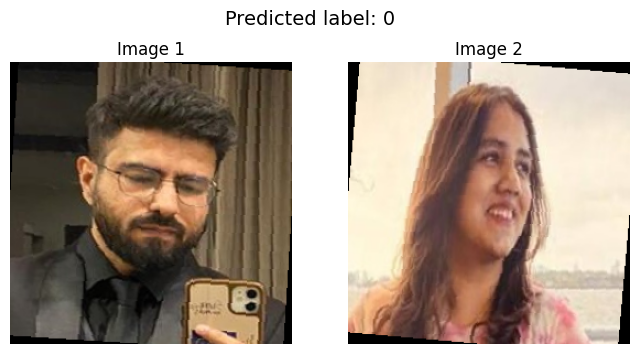

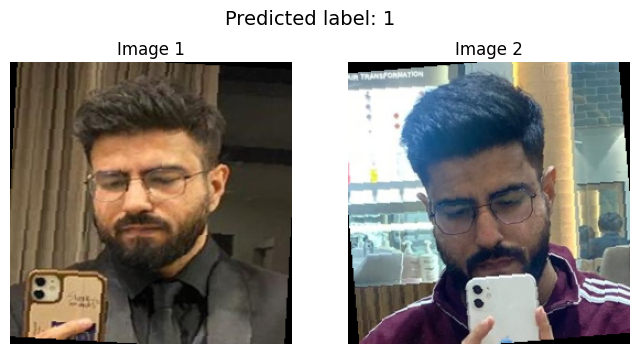

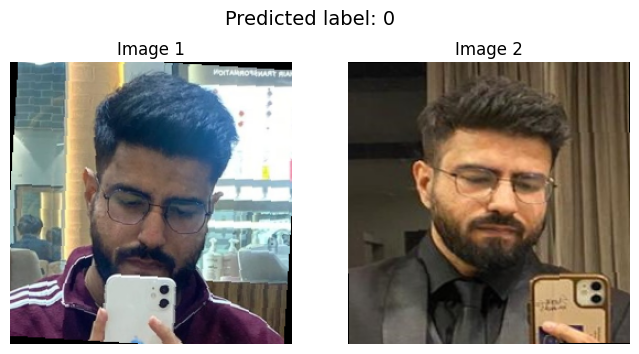

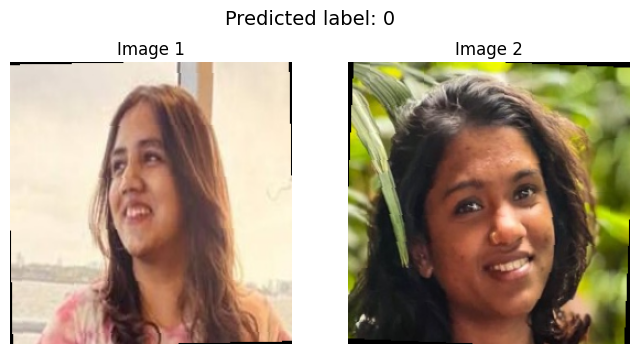

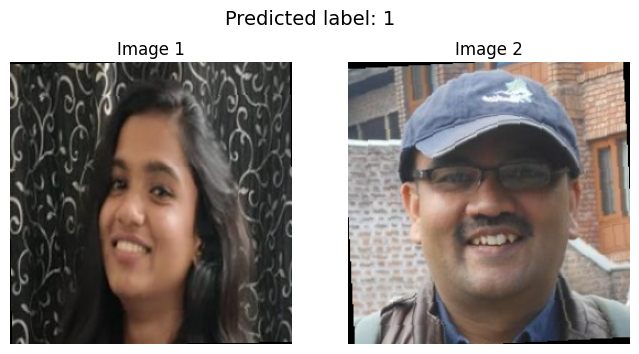

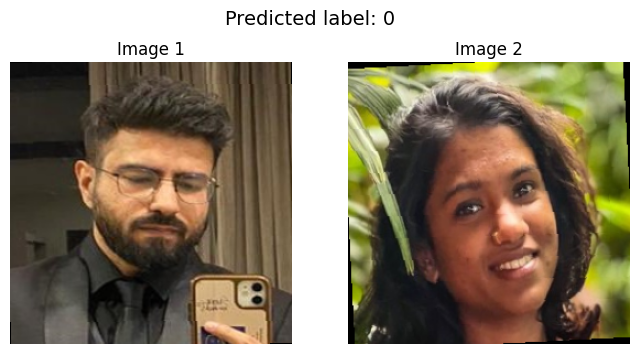

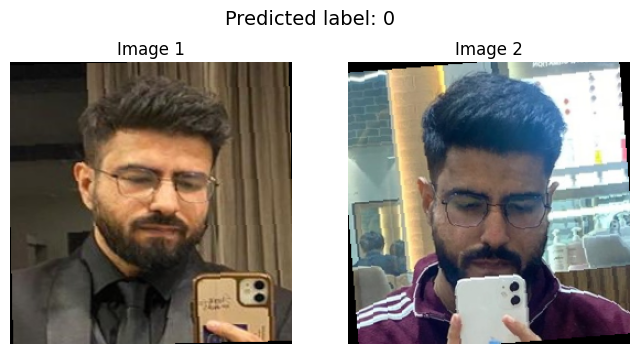

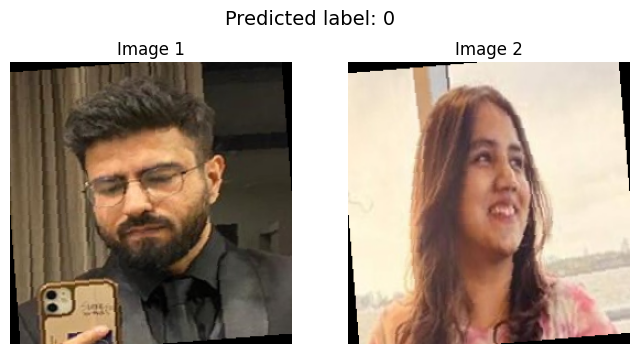

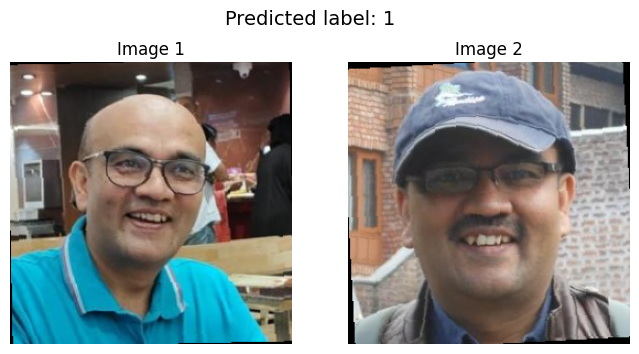

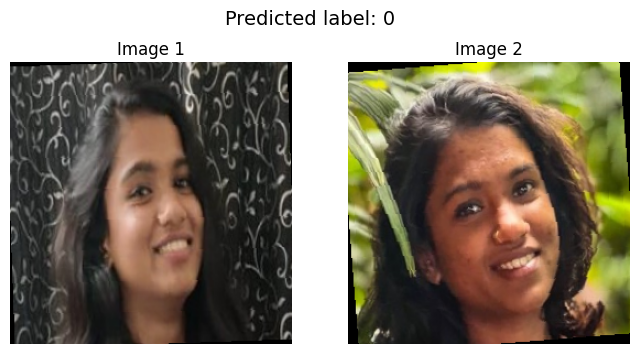

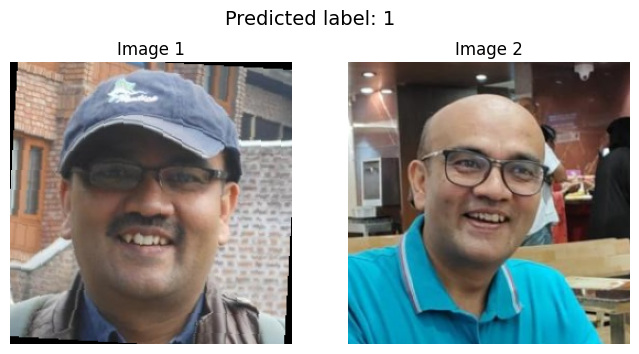

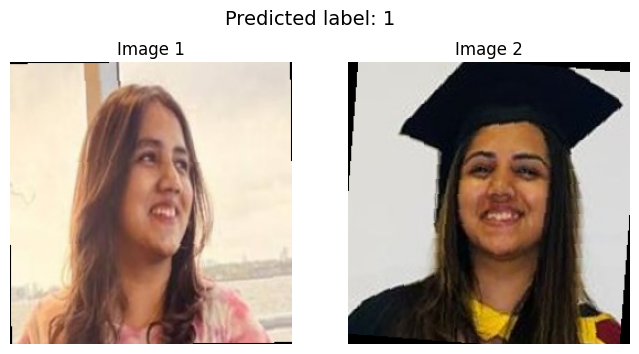

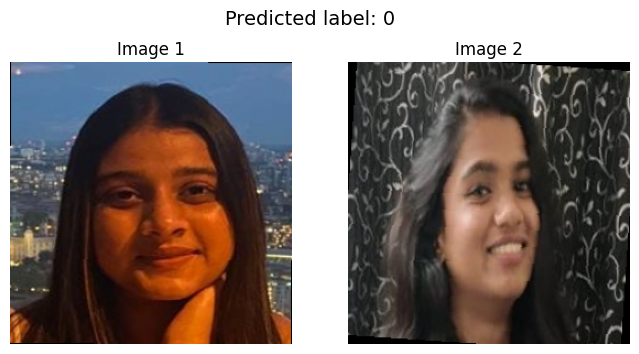

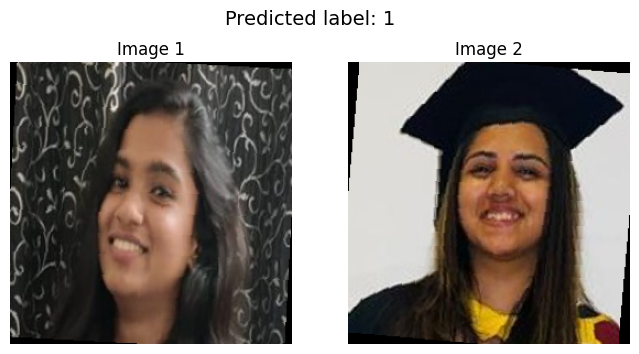

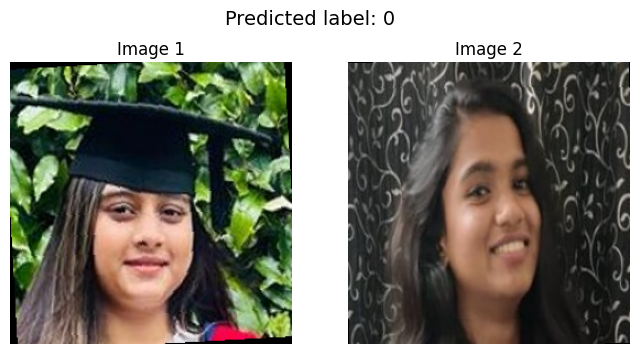

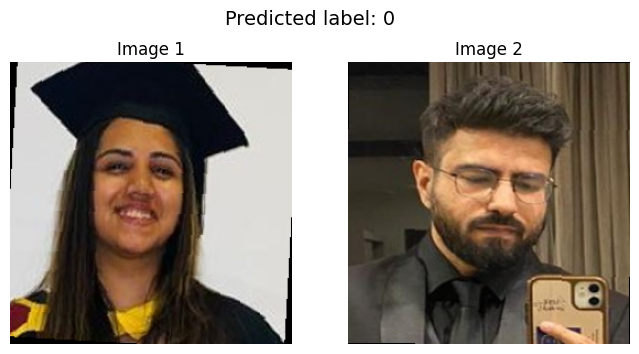

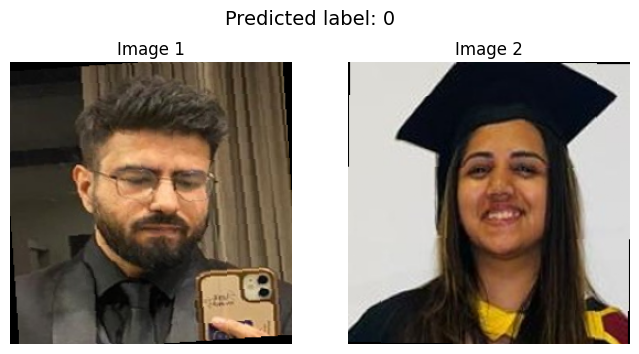

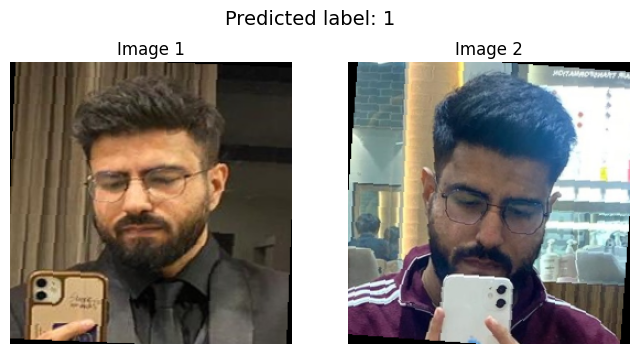

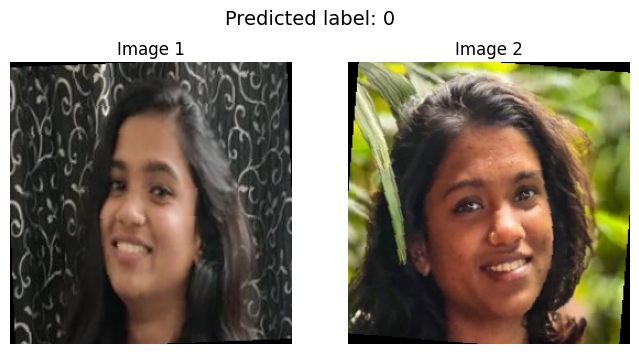

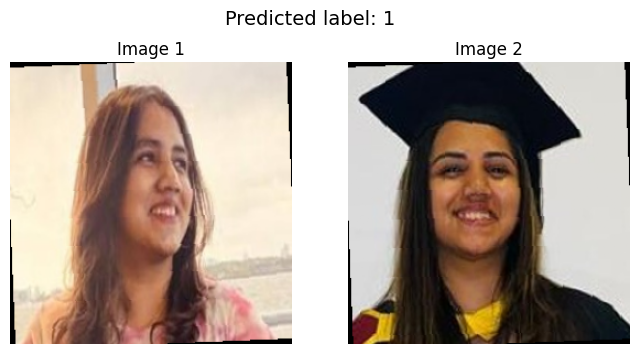

Accuracy on the test dataset: 70.00%


In [173]:
test_2_images_paths = []
test_2_labels_name = []
test_folder_2 = "./test_2"
# Load images and labels from subfolders
test_subfolders = os.listdir(test_folder_2)
for subfolder in test_subfolders:
    subfolder_path = os.path.join(test_folder_2, subfolder)
    if os.path.isdir(subfolder_path):
        images, labels = load_and_label_images(subfolder_path)
        test_2_images_paths.extend(images)
        test_2_labels_name.extend(labels)

# Define transformations for the images (resize, augment and convert to tensor)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Resize to a larger size for better cropping
#     transforms.RandomCrop((224, 224)),  # Randomly crop to the desired size
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.RandomRotation(degrees=5),  # Randomly rotate by up to 15 degrees
    transforms.ToTensor(),
])
        
        
test_2_images = preprocess_and_load_images(test_2_images_paths)
test_2_pairs, test_2_labels = create_random_pairs_and_labels(test_2_images, test_2_labels_name, num_positive_pairs_to_select = 10, num_negative_pairs_to_select = 10)
test_2_dataset = SiameseDataset(test_2_pairs, test_2_labels, transform=transform)
batch_size = 8  # Adjust batch size as needed
test_2_loader = DataLoader(test_2_dataset, batch_size=batch_size, shuffle = True)
criterion = torch.nn.CrossEntropyLoss()
Prediction_threshold = 0.55
visualize_predictions(model, test_2_loader, show_predictions=True)

## GAN

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import matplotlib.pyplot as plt


In [28]:
# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")  # Use the GPU
    print("Using GPU:", torch.cuda.get_device_name(0))  # Display GPU name
else:
    device = torch.device("cpu")  # Use the CPU
    print("CUDA is not available. Using CPU.")

Using GPU: NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [29]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.datasets as dset

# Specify the root directory of your LFW dataset
lfw_data_directory = r'D:\OneDrive - Indian Institute of Technology Bombay\Important_Downloads\Semester 7\EE782\Assignment2\lfw\lfw'

new_image_size = 64
dataset = dset.ImageFolder(root=lfw_data_directory,
                           transform=transforms.Compose([
                               transforms.Resize(new_image_size),
                               transforms.CenterCrop(new_image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

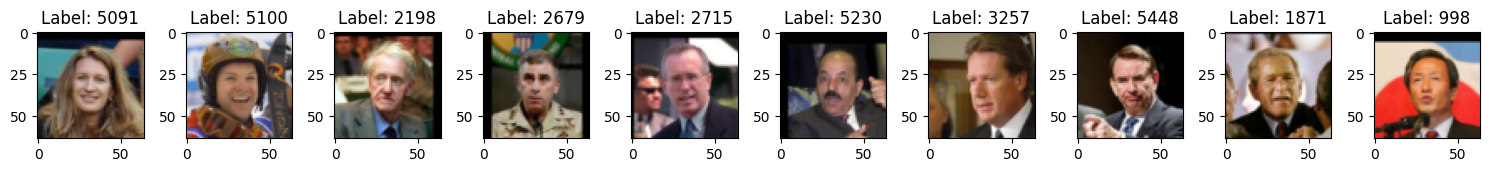

In [30]:
import matplotlib.pyplot as plt
import random

# Define the number of images to display
num_images_to_show = 10 

# Create a figure for displaying the images
fig, image_grid = plt.subplots(1, num_images_to_show, figsize=(15, 5))

# Randomly select and display images
for i in range(num_images_to_show):
    # Randomly choose an image index from the dataset
    random_index = random.randint(0, len(dataset) - 1)
    image, label = dataset[random_index]
    
    # Convert the PyTorch tensor to a NumPy array
    image_array = image.permute(1, 2, 0).numpy()
    
    # If image normalization was applied, denormalize the image
    image_array = 0.5 * image_array + 0.5  # Assuming mean=0.5 and std=0.5
    
    # Display the image
    image_grid[i].imshow(image_array)
    image_grid[i].set_title(f"Label: {label}")

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()


In [31]:
# Create a DataLoader to efficiently load and iterate through the dataset
batch_size = 64  # Adjust as needed
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True)

In [32]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
dataloader_size = len(dataloader)
print("Size of Dataloader:", dataloader_size)

Size of Dataloader: 207


I have adpated the structure of the training loop from the following
https://github.com/pytorch/examples/blob/main/dcgan/main.py

In [50]:
# Number of available GPUs
num_gpus = 1  # You can set this to the actual number of GPUs if different

# Dimension of the input noise vector
noise_dim = 100 

# Number of generator feature maps
generator_feature_maps = 64 

# Number of discriminator feature maps
discriminator_feature_maps = 64 

# Number of image channels (e.g., 3 for RGB images)
num_channels = 3


In [51]:
# Custom weights initialization function called on netG and netD
def initialize_weights(module):
    class_name = module.__class__.__name__
    if 'Conv' in class_name:
        # Initialize Convolutional layers with mean 0.0 and standard deviation 0.02
        torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
    elif 'BatchNorm' in class_name:
        # Initialize BatchNorm layers with weight=1.0 and bias=0.02
        torch.nn.init.normal_(module.weight, mean=1.0, std=0.02)
        torch.nn.init.zeros_(module.bias)

In [75]:
class Generator(nn.Module):
    def __init__(self, num_gpus):
        super(Generator, self).__init__()
        self.num_gpus = num_gpus
        self.main = nn.Sequential(
            nn.ConvTranspose2d(noise_dim, 1024, 4, 1, 0, bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(True),

            nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, num_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        if input.is_cuda and self.num_gpus > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.num_gpus))
        else:
            output = self.main(input)
        return output


In [76]:
netG = Generator(num_gpus).to(device)
netG.apply(initialize_weights)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()


In [77]:
class Discriminator(nn.Module):
    def __init__(self, num_gpus):
        super(Discriminator, self).__init__()
        self.num_gpus = num_gpus
        self.main = nn.Sequential(
            nn.Conv2d(num_channels, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        if input.is_cuda and self.num_gpus > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.num_gpus))
        else:
            output = self.main(input)

        return output.view(-1, 1).squeeze(1)


In [78]:
netD = Discriminator(num_gpus).to(device)
netD.apply(initialize_weights)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [79]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss is commonly used for GANs

fixed_noise = torch.randn(batch_size, noise_dim, 1, 1, device=device)  # Use the defined noise_dim
real_label = 1.0  
fake_label = 0.0  
learning_rate = 0.0001  # A common learning rate for GANs
beta1 = 0.7  # Exponential decay rate for the first moment estimates in Adam

# Setup optimizers with adjusted learning rate and beta1
optimizerD = optim.Adam(netD.parameters(), lr=learning_rate, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=learning_rate, betas=(beta1, 0.999))


In [81]:
def train_discriminator(netD, real_images, optimizerD, criterion):
    batch_size = real_images.size(0)
    real_labels = torch.full((batch_size,), 1.0, dtype=real_images.dtype, device=device)
    optimizerD.zero_grad()
    output_real = netD(real_images)
    errD_real = criterion(output_real, real_labels)
    errD_real.backward()
    D_x = output_real.mean().item()
    noise = torch.randn(batch_size, noise_dim, 1, 1, device=device)
    fake_images = netG(noise)
    real_labels.fill_(0.0)
    output_fake = netD(fake_images.detach())
    errD_fake = criterion(output_fake, real_labels)
    errD_fake.backward()
    errD = errD_real + errD_fake
    optimizerD.step()
    D_G_z1 = output_fake.mean().item()
    return errD, D_x, D_G_z1

def train_generator(netG, optimizerG, criterion):
    optimizerG.zero_grad()
    real_labels.fill_(1.0)
    output_generator = netD(fake_images)
    errG = criterion(output_generator, real_labels)
    errG.backward()
    optimizerG.step()
    D_G_z2 = output_generator.mean().item()
    return errG, D_G_z2

# Training loop
num_epochs = 200
total_batches = len(dataloader)
print("Starting training...")

for epoch in range(num_epochs):
    dataloader_iterator = iter(dataloader)
    
    # Initialize losses and metrics
    total_lossD = 0.0
    total_lossG = 0.0
    total_D_x = 0.0
    total_D_G_z1 = 0.0
    total_D_G_z2 = 0.0
    
    # Use tqdm for progress visualization
    for i, data in enumerate(tqdm(dataloader_iterator, total=total_batches), 0):
        errD, D_x, D_G_z1 = train_discriminator(netD, data[0].to(device), optimizerD, criterion)
        errG, D_G_z2 = train_generator(netG, optimizerG, criterion)

        # Update total losses and metrics
        total_lossD += errD.item()
        total_lossG += errG.item()
        total_D_x += D_x
        total_D_G_z1 += D_G_z1
        total_D_G_z2 += D_G_z2

    # Calculate average losses and metrics for the epoch
    avg_lossD = total_lossD / len(dataloader)
    avg_lossG = total_lossG / len(dataloader)
    avg_D_x = total_D_x / len(dataloader)
    avg_D_G_z1 = total_D_G_z1 / len(dataloader)
    avg_D_G_z2 = total_D_G_z2 / len(dataloader)
    
    # Print progress and losses after each epoch
    print(f'[{epoch}/{num_epochs}] Avg Loss_D: {avg_lossD:.4f} Avg Loss_G: {avg_lossG:.4f} Avg D(x): {avg_D_x:.4f} Avg D(G(z)): {avg_D_G_z1:.4f} / {avg_D_G_z2:.4f}')
    
    if epoch % 1 == 0:
        vutils.save_image(real_images,
                'real_samples.png',
                normalize=True)
        fake_images = netG(fixed_noise)
        vutils.save_image(fake_images.detach(),
                'fake_samples_epoch_%03d.png' % epoch,
                normalize=True)


Starting training...


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [02:29<00:00,  1.39it/s]


[0/200] Loss_D: 0.1394 Loss_G: 8.1219 D(x): 0.9328 D(G(z)): 0.0419 / 0.0004


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:58<00:00,  3.57it/s]


[1/200] Loss_D: 0.0886 Loss_G: 6.6114 D(x): 0.9609 D(G(z)): 0.0293 / 0.0019


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:55<00:00,  3.70it/s]


[2/200] Loss_D: 0.9687 Loss_G: 11.3577 D(x): 0.6479 D(G(z)): 0.0001 / 0.0000


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:54<00:00,  3.77it/s]


[3/200] Loss_D: 0.0897 Loss_G: 6.0000 D(x): 0.9719 D(G(z)): 0.0543 / 0.0038


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:55<00:00,  3.74it/s]


[4/200] Loss_D: 0.4327 Loss_G: 5.2214 D(x): 0.7833 D(G(z)): 0.0473 / 0.0192


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:55<00:00,  3.73it/s]


[5/200] Loss_D: 0.3433 Loss_G: 5.5849 D(x): 0.8510 D(G(z)): 0.0943 / 0.0103


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:56<00:00,  3.70it/s]


[6/200] Loss_D: 0.2699 Loss_G: 5.6292 D(x): 0.9294 D(G(z)): 0.1529 / 0.0101


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:56<00:00,  3.69it/s]


[7/200] Loss_D: 0.2471 Loss_G: 4.9094 D(x): 0.8729 D(G(z)): 0.0474 / 0.0268


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:56<00:00,  3.70it/s]


[8/200] Loss_D: 0.2057 Loss_G: 4.4422 D(x): 0.9792 D(G(z)): 0.1517 / 0.0186


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:56<00:00,  3.66it/s]


[9/200] Loss_D: 0.1802 Loss_G: 6.3025 D(x): 0.9418 D(G(z)): 0.0751 / 0.0053


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:55<00:00,  3.72it/s]


[10/200] Loss_D: 0.2415 Loss_G: 5.1068 D(x): 0.9525 D(G(z)): 0.1402 / 0.0147


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:55<00:00,  3.70it/s]


[11/200] Loss_D: 0.3370 Loss_G: 4.5061 D(x): 0.8112 D(G(z)): 0.0443 / 0.0275


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:56<00:00,  3.68it/s]


[12/200] Loss_D: 0.6453 Loss_G: 3.5395 D(x): 0.6627 D(G(z)): 0.0502 / 0.0544


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:56<00:00,  3.67it/s]


[13/200] Loss_D: 0.7968 Loss_G: 3.4759 D(x): 0.5903 D(G(z)): 0.0754 / 0.0865


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:55<00:00,  3.70it/s]


[14/200] Loss_D: 0.5123 Loss_G: 2.0334 D(x): 0.8021 D(G(z)): 0.1751 / 0.2028


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:56<00:00,  3.64it/s]


[15/200] Loss_D: 0.1963 Loss_G: 3.5305 D(x): 0.8874 D(G(z)): 0.0627 / 0.0421


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:55<00:00,  3.70it/s]


[16/200] Loss_D: 0.3744 Loss_G: 3.8740 D(x): 0.8446 D(G(z)): 0.1218 / 0.0422


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:57<00:00,  3.63it/s]


[17/200] Loss_D: 0.2592 Loss_G: 4.4198 D(x): 0.8856 D(G(z)): 0.1035 / 0.0265


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:58<00:00,  3.57it/s]


[18/200] Loss_D: 0.3956 Loss_G: 5.3834 D(x): 0.7677 D(G(z)): 0.0477 / 0.0137


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:58<00:00,  3.52it/s]


[19/200] Loss_D: 0.1753 Loss_G: 3.8137 D(x): 0.9046 D(G(z)): 0.0579 / 0.0434


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [01:17<00:00,  2.67it/s]


[20/200] Loss_D: 0.4623 Loss_G: 3.7471 D(x): 0.7670 D(G(z)): 0.0935 / 0.0447


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [01:14<00:00,  2.80it/s]


[21/200] Loss_D: 0.1358 Loss_G: 4.7436 D(x): 0.9507 D(G(z)): 0.0711 / 0.0210


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [01:22<00:00,  2.50it/s]


[22/200] Loss_D: 0.3543 Loss_G: 5.5095 D(x): 0.9351 D(G(z)): 0.2087 / 0.0080


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [01:15<00:00,  2.73it/s]


[23/200] Loss_D: 0.1763 Loss_G: 5.0520 D(x): 0.9646 D(G(z)): 0.1165 / 0.0135


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [01:08<00:00,  3.03it/s]


[24/200] Loss_D: 0.5496 Loss_G: 3.7181 D(x): 0.9727 D(G(z)): 0.3199 / 0.0544


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [01:14<00:00,  2.79it/s]


[25/200] Loss_D: 0.2127 Loss_G: 3.6262 D(x): 0.9299 D(G(z)): 0.1096 / 0.0420


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [01:09<00:00,  2.96it/s]


[26/200] Loss_D: 0.7636 Loss_G: 4.7557 D(x): 0.9132 D(G(z)): 0.4234 / 0.0162


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [01:14<00:00,  2.77it/s]


[27/200] Loss_D: 0.2767 Loss_G: 3.6322 D(x): 0.9046 D(G(z)): 0.1372 / 0.0483


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [01:09<00:00,  2.99it/s]


[28/200] Loss_D: 0.2851 Loss_G: 3.4083 D(x): 0.8757 D(G(z)): 0.1242 / 0.0545


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[29/200] Loss_D: 0.4789 Loss_G: 3.9627 D(x): 0.8590 D(G(z)): 0.2237 / 0.0361


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[30/200] Loss_D: 0.3954 Loss_G: 3.1458 D(x): 0.7684 D(G(z)): 0.0803 / 0.0674


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.62it/s]


[31/200] Loss_D: 0.5195 Loss_G: 4.5175 D(x): 0.8823 D(G(z)): 0.2623 / 0.0184


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.66it/s]


[32/200] Loss_D: 0.6194 Loss_G: 3.8128 D(x): 0.9204 D(G(z)): 0.3631 / 0.0350


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:45<00:00,  4.52it/s]


[33/200] Loss_D: 0.3418 Loss_G: 3.1094 D(x): 0.8136 D(G(z)): 0.0897 / 0.0687


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[34/200] Loss_D: 0.5926 Loss_G: 3.2670 D(x): 0.8987 D(G(z)): 0.3078 / 0.0713


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[35/200] Loss_D: 0.8747 Loss_G: 4.4089 D(x): 0.5069 D(G(z)): 0.0319 / 0.0249


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.62it/s]


[36/200] Loss_D: 0.5395 Loss_G: 2.4466 D(x): 0.8142 D(G(z)): 0.2370 / 0.1229


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.66it/s]


[37/200] Loss_D: 0.4663 Loss_G: 4.0672 D(x): 0.9540 D(G(z)): 0.2905 / 0.0283


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[38/200] Loss_D: 0.3244 Loss_G: 4.2712 D(x): 0.9445 D(G(z)): 0.2153 / 0.0210


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[39/200] Loss_D: 0.2958 Loss_G: 4.1439 D(x): 0.8386 D(G(z)): 0.0883 / 0.0259


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.68it/s]


[40/200] Loss_D: 0.4291 Loss_G: 3.4672 D(x): 0.8387 D(G(z)): 0.1882 / 0.0511


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[41/200] Loss_D: 0.3743 Loss_G: 3.4914 D(x): 0.8454 D(G(z)): 0.1599 / 0.0508


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.64it/s]


[42/200] Loss_D: 0.3451 Loss_G: 4.3231 D(x): 0.7641 D(G(z)): 0.0450 / 0.0250


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.64it/s]


[43/200] Loss_D: 0.7946 Loss_G: 1.7718 D(x): 0.5403 D(G(z)): 0.0692 / 0.2322


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[44/200] Loss_D: 0.4353 Loss_G: 2.2493 D(x): 0.7877 D(G(z)): 0.1521 / 0.1510


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.66it/s]


[45/200] Loss_D: 0.5653 Loss_G: 2.2857 D(x): 0.6743 D(G(z)): 0.1020 / 0.1394


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.61it/s]


[46/200] Loss_D: 0.6573 Loss_G: 2.6913 D(x): 0.6982 D(G(z)): 0.1944 / 0.0979


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.64it/s]


[47/200] Loss_D: 0.7997 Loss_G: 1.4437 D(x): 0.7497 D(G(z)): 0.3409 / 0.2870


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[48/200] Loss_D: 0.6187 Loss_G: 1.9119 D(x): 0.7317 D(G(z)): 0.1924 / 0.2060


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[49/200] Loss_D: 0.5042 Loss_G: 2.2368 D(x): 0.7232 D(G(z)): 0.1149 / 0.1511


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[50/200] Loss_D: 0.3257 Loss_G: 2.5352 D(x): 0.8666 D(G(z)): 0.1421 / 0.1234


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.67it/s]


[51/200] Loss_D: 0.6669 Loss_G: 2.9388 D(x): 0.8042 D(G(z)): 0.2893 / 0.0827


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[52/200] Loss_D: 0.5436 Loss_G: 2.8268 D(x): 0.8165 D(G(z)): 0.2458 / 0.0965


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.67it/s]


[53/200] Loss_D: 0.4021 Loss_G: 2.0820 D(x): 0.7922 D(G(z)): 0.1225 / 0.1813


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[54/200] Loss_D: 0.4136 Loss_G: 2.5306 D(x): 0.8261 D(G(z)): 0.1754 / 0.1196


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[55/200] Loss_D: 1.5752 Loss_G: 0.4838 D(x): 0.2957 D(G(z)): 0.0628 / 0.6682


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.67it/s]


[56/200] Loss_D: 0.3525 Loss_G: 3.3033 D(x): 0.7717 D(G(z)): 0.0552 / 0.0620


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.61it/s]


[57/200] Loss_D: 0.6809 Loss_G: 3.2226 D(x): 0.9263 D(G(z)): 0.3811 / 0.0630


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[58/200] Loss_D: 0.8093 Loss_G: 0.3416 D(x): 0.5484 D(G(z)): 0.0612 / 0.7436


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[59/200] Loss_D: 0.3680 Loss_G: 2.3403 D(x): 0.7836 D(G(z)): 0.0894 / 0.1314


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.60it/s]


[60/200] Loss_D: 0.6696 Loss_G: 2.2111 D(x): 0.7163 D(G(z)): 0.2192 / 0.1591


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[61/200] Loss_D: 0.4195 Loss_G: 3.0981 D(x): 0.7958 D(G(z)): 0.1435 / 0.0757


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.64it/s]


[62/200] Loss_D: 0.4860 Loss_G: 2.3595 D(x): 0.6938 D(G(z)): 0.0746 / 0.1357


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[63/200] Loss_D: 0.3610 Loss_G: 3.3403 D(x): 0.9232 D(G(z)): 0.2113 / 0.0652


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.64it/s]


[64/200] Loss_D: 0.8385 Loss_G: 2.3691 D(x): 0.7252 D(G(z)): 0.3069 / 0.1322


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[65/200] Loss_D: 1.0092 Loss_G: 2.5857 D(x): 0.9517 D(G(z)): 0.5317 / 0.1074


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.60it/s]


[66/200] Loss_D: 0.4672 Loss_G: 2.7507 D(x): 0.6891 D(G(z)): 0.0506 / 0.0873


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.62it/s]


[67/200] Loss_D: 0.5679 Loss_G: 3.7075 D(x): 0.9703 D(G(z)): 0.3781 / 0.0333


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:45<00:00,  4.56it/s]


[68/200] Loss_D: 0.5044 Loss_G: 3.3818 D(x): 0.8533 D(G(z)): 0.2450 / 0.0535


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.60it/s]


[69/200] Loss_D: 0.3630 Loss_G: 2.3585 D(x): 0.7960 D(G(z)): 0.0936 / 0.1332


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.61it/s]


[70/200] Loss_D: 0.2444 Loss_G: 3.0733 D(x): 0.8815 D(G(z)): 0.0994 / 0.0661


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.60it/s]


[71/200] Loss_D: 0.3496 Loss_G: 2.1528 D(x): 0.9277 D(G(z)): 0.2089 / 0.1584


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[72/200] Loss_D: 0.3979 Loss_G: 3.6540 D(x): 0.7511 D(G(z)): 0.0554 / 0.0403


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.62it/s]


[73/200] Loss_D: 0.4051 Loss_G: 3.8421 D(x): 0.9033 D(G(z)): 0.2195 / 0.0339


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[74/200] Loss_D: 0.2047 Loss_G: 3.9686 D(x): 0.9173 D(G(z)): 0.0999 / 0.0304


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[75/200] Loss_D: 0.5464 Loss_G: 1.5932 D(x): 0.6579 D(G(z)): 0.0451 / 0.2686


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[76/200] Loss_D: 0.3270 Loss_G: 3.3172 D(x): 0.7845 D(G(z)): 0.0572 / 0.0634


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.70it/s]


[77/200] Loss_D: 0.8702 Loss_G: 1.1248 D(x): 0.5978 D(G(z)): 0.1781 / 0.4038


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.66it/s]


[78/200] Loss_D: 0.3207 Loss_G: 3.0106 D(x): 0.9457 D(G(z)): 0.2088 / 0.0688


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.71it/s]


[79/200] Loss_D: 0.4449 Loss_G: 2.8418 D(x): 0.7612 D(G(z)): 0.0980 / 0.1095


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.69it/s]


[80/200] Loss_D: 0.5797 Loss_G: 4.9212 D(x): 0.9975 D(G(z)): 0.3847 / 0.0103


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:45<00:00,  4.53it/s]


[81/200] Loss_D: 0.4234 Loss_G: 2.4948 D(x): 0.8003 D(G(z)): 0.1454 / 0.1192


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.66it/s]


[82/200] Loss_D: 0.2099 Loss_G: 2.6127 D(x): 0.8875 D(G(z)): 0.0767 / 0.1116


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:42<00:00,  4.82it/s]


[83/200] Loss_D: 0.4467 Loss_G: 3.5475 D(x): 0.8140 D(G(z)): 0.1666 / 0.0547


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:45<00:00,  4.55it/s]


[84/200] Loss_D: 0.2707 Loss_G: 3.3261 D(x): 0.8720 D(G(z)): 0.1140 / 0.0489


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[85/200] Loss_D: 0.2227 Loss_G: 3.9615 D(x): 0.9259 D(G(z)): 0.1256 / 0.0284


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:45<00:00,  4.58it/s]


[86/200] Loss_D: 0.2886 Loss_G: 3.5812 D(x): 0.8188 D(G(z)): 0.0601 / 0.0511


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.75it/s]


[87/200] Loss_D: 0.6008 Loss_G: 2.0843 D(x): 0.6130 D(G(z)): 0.0373 / 0.1987


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.74it/s]


[88/200] Loss_D: 0.2327 Loss_G: 4.5821 D(x): 0.9794 D(G(z)): 0.1587 / 0.0182


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.67it/s]


[89/200] Loss_D: 0.2396 Loss_G: 2.4697 D(x): 0.9307 D(G(z)): 0.1344 / 0.1404


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.70it/s]


[90/200] Loss_D: 0.1886 Loss_G: 6.1525 D(x): 0.9343 D(G(z)): 0.0975 / 0.0053


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.73it/s]


[91/200] Loss_D: 0.1677 Loss_G: 4.8125 D(x): 0.9652 D(G(z)): 0.1094 / 0.0151


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.64it/s]


[92/200] Loss_D: 0.2299 Loss_G: 3.4179 D(x): 0.9447 D(G(z)): 0.1411 / 0.0511


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.67it/s]


[93/200] Loss_D: 0.1931 Loss_G: 4.9300 D(x): 0.9375 D(G(z)): 0.1072 / 0.0135


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.68it/s]


[94/200] Loss_D: 0.7877 Loss_G: 1.5615 D(x): 0.5274 D(G(z)): 0.0198 / 0.3258


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.68it/s]


[95/200] Loss_D: 0.4068 Loss_G: 3.4279 D(x): 0.7273 D(G(z)): 0.0480 / 0.0598


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.73it/s]


[96/200] Loss_D: 0.4051 Loss_G: 2.3059 D(x): 0.7168 D(G(z)): 0.0240 / 0.1671


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.75it/s]


[97/200] Loss_D: 0.2972 Loss_G: 4.7072 D(x): 0.9627 D(G(z)): 0.1939 / 0.0154


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.72it/s]


[98/200] Loss_D: 0.1209 Loss_G: 3.4952 D(x): 0.9832 D(G(z)): 0.0916 / 0.0476


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.73it/s]


[99/200] Loss_D: 0.2005 Loss_G: 3.9729 D(x): 0.9445 D(G(z)): 0.1228 / 0.0318


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.68it/s]


[100/200] Loss_D: 0.1757 Loss_G: 3.7401 D(x): 0.9247 D(G(z)): 0.0805 / 0.0503


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.66it/s]


[101/200] Loss_D: 0.1227 Loss_G: 3.9900 D(x): 0.9512 D(G(z)): 0.0640 / 0.0325


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.64it/s]


[102/200] Loss_D: 0.1197 Loss_G: 3.9649 D(x): 0.9413 D(G(z)): 0.0535 / 0.0316


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.62it/s]


[103/200] Loss_D: 0.1824 Loss_G: 3.7009 D(x): 0.9370 D(G(z)): 0.0856 / 0.0512


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[104/200] Loss_D: 2.2161 Loss_G: 1.3876 D(x): 0.4287 D(G(z)): 0.3212 / 0.4002


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.66it/s]


[105/200] Loss_D: 0.1963 Loss_G: 4.2369 D(x): 0.8963 D(G(z)): 0.0676 / 0.0287


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[106/200] Loss_D: 0.1321 Loss_G: 4.7987 D(x): 0.9109 D(G(z)): 0.0328 / 0.0188


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:45<00:00,  4.60it/s]


[107/200] Loss_D: 0.2096 Loss_G: 4.2033 D(x): 0.8801 D(G(z)): 0.0599 / 0.0325


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.61it/s]


[108/200] Loss_D: 0.1901 Loss_G: 3.8558 D(x): 0.8793 D(G(z)): 0.0505 / 0.0437


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.64it/s]


[109/200] Loss_D: 0.2648 Loss_G: 3.9640 D(x): 0.8060 D(G(z)): 0.0215 / 0.0476


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[110/200] Loss_D: 0.3336 Loss_G: 3.7906 D(x): 0.8288 D(G(z)): 0.0950 / 0.0489


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.62it/s]


[111/200] Loss_D: 0.1747 Loss_G: 2.6953 D(x): 0.9417 D(G(z)): 0.0996 / 0.1032


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.75it/s]


[112/200] Loss_D: 0.2742 Loss_G: 2.1796 D(x): 0.7926 D(G(z)): 0.0258 / 0.1662


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.69it/s]


[113/200] Loss_D: 0.1162 Loss_G: 6.1568 D(x): 0.9840 D(G(z)): 0.0899 / 0.0041


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.68it/s]


[114/200] Loss_D: 0.7067 Loss_G: 4.2502 D(x): 0.8839 D(G(z)): 0.2957 / 0.0399


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.73it/s]


[115/200] Loss_D: 0.3003 Loss_G: 2.9520 D(x): 0.7938 D(G(z)): 0.0372 / 0.0995


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.67it/s]


[116/200] Loss_D: 0.3143 Loss_G: 4.6591 D(x): 0.9453 D(G(z)): 0.2037 / 0.0146


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.68it/s]


[117/200] Loss_D: 0.1702 Loss_G: 4.5066 D(x): 0.8917 D(G(z)): 0.0376 / 0.0230


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.72it/s]


[118/200] Loss_D: 0.1326 Loss_G: 4.5804 D(x): 0.9744 D(G(z)): 0.0939 / 0.0200


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[119/200] Loss_D: 1.9864 Loss_G: 1.0252 D(x): 0.4621 D(G(z)): 0.3072 / 0.4828


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.75it/s]


[120/200] Loss_D: 0.2159 Loss_G: 3.3869 D(x): 0.9318 D(G(z)): 0.1190 / 0.0525


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.71it/s]


[121/200] Loss_D: 0.1744 Loss_G: 4.2583 D(x): 0.9480 D(G(z)): 0.1051 / 0.0249


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.67it/s]


[122/200] Loss_D: 0.2740 Loss_G: 3.3076 D(x): 0.7973 D(G(z)): 0.0264 / 0.0743


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.76it/s]


[123/200] Loss_D: 0.0517 Loss_G: 4.2123 D(x): 0.9807 D(G(z)): 0.0298 / 0.0251


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.64it/s]


[124/200] Loss_D: 0.2254 Loss_G: 2.7726 D(x): 0.8246 D(G(z)): 0.0162 / 0.1021


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.70it/s]


[125/200] Loss_D: 0.0766 Loss_G: 5.0959 D(x): 0.9838 D(G(z)): 0.0554 / 0.0141


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.78it/s]


[126/200] Loss_D: 0.2125 Loss_G: 4.8909 D(x): 0.9162 D(G(z)): 0.1061 / 0.0142


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.69it/s]


[127/200] Loss_D: 0.1797 Loss_G: 4.6264 D(x): 0.9003 D(G(z)): 0.0511 / 0.0250


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.76it/s]


[128/200] Loss_D: 0.0892 Loss_G: 4.6665 D(x): 0.9360 D(G(z)): 0.0196 / 0.0195


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.76it/s]


[129/200] Loss_D: 0.1182 Loss_G: 4.7128 D(x): 0.9723 D(G(z)): 0.0780 / 0.0153


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.68it/s]


[130/200] Loss_D: 0.1279 Loss_G: 5.5059 D(x): 0.9792 D(G(z)): 0.0938 / 0.0079


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.75it/s]


[131/200] Loss_D: 0.1996 Loss_G: 5.8252 D(x): 0.9945 D(G(z)): 0.1554 / 0.0049


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.61it/s]


[132/200] Loss_D: 0.1203 Loss_G: 4.5606 D(x): 0.9229 D(G(z)): 0.0340 / 0.0212


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.61it/s]


[133/200] Loss_D: 0.3638 Loss_G: 1.8735 D(x): 0.7414 D(G(z)): 0.0266 / 0.3161


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.74it/s]


[134/200] Loss_D: 1.0466 Loss_G: 8.5711 D(x): 0.9998 D(G(z)): 0.5361 / 0.0003


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:45<00:00,  4.58it/s]


[135/200] Loss_D: 0.1228 Loss_G: 4.4229 D(x): 0.9104 D(G(z)): 0.0188 / 0.0217


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[136/200] Loss_D: 0.0524 Loss_G: 5.1996 D(x): 0.9734 D(G(z)): 0.0239 / 0.0121


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.66it/s]


[137/200] Loss_D: 0.1024 Loss_G: 4.3155 D(x): 0.9879 D(G(z)): 0.0806 / 0.0330


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.64it/s]


[138/200] Loss_D: 0.2116 Loss_G: 4.5200 D(x): 0.9840 D(G(z)): 0.1469 / 0.0202


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[139/200] Loss_D: 0.1129 Loss_G: 5.1356 D(x): 0.9219 D(G(z)): 0.0264 / 0.0110


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.67it/s]


[140/200] Loss_D: 0.1118 Loss_G: 4.7836 D(x): 0.9434 D(G(z)): 0.0437 / 0.0184


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [02:33<00:00,  1.35it/s]


[141/200] Loss_D: 0.0666 Loss_G: 6.3653 D(x): 0.9767 D(G(z)): 0.0374 / 0.0038


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [01:46<00:00,  1.95it/s]


[142/200] Loss_D: 0.3676 Loss_G: 2.5063 D(x): 0.7674 D(G(z)): 0.0397 / 0.2165


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.67it/s]


[143/200] Loss_D: 0.1009 Loss_G: 6.1282 D(x): 0.9502 D(G(z)): 0.0404 / 0.0056


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[144/200] Loss_D: 0.1363 Loss_G: 4.8717 D(x): 0.9937 D(G(z)): 0.0977 / 0.0153


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.61it/s]


[145/200] Loss_D: 0.0748 Loss_G: 4.6887 D(x): 0.9450 D(G(z)): 0.0160 / 0.0193


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[146/200] Loss_D: 0.0857 Loss_G: 3.9674 D(x): 0.9483 D(G(z)): 0.0273 / 0.0458


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:45<00:00,  4.54it/s]


[147/200] Loss_D: 0.2111 Loss_G: 5.1155 D(x): 0.8578 D(G(z)): 0.0153 / 0.0211


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.70it/s]


[148/200] Loss_D: 0.0994 Loss_G: 5.5334 D(x): 0.9311 D(G(z)): 0.0242 / 0.0107


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.77it/s]


[149/200] Loss_D: 0.0676 Loss_G: 5.6895 D(x): 0.9672 D(G(z)): 0.0301 / 0.0078


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.77it/s]


[150/200] Loss_D: 0.1154 Loss_G: 5.0501 D(x): 0.9101 D(G(z)): 0.0168 / 0.0210


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.77it/s]


[151/200] Loss_D: 0.1049 Loss_G: 4.6494 D(x): 0.9932 D(G(z)): 0.0828 / 0.0159


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.81it/s]


[152/200] Loss_D: 0.4231 Loss_G: 5.8984 D(x): 0.9264 D(G(z)): 0.2231 / 0.0057


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.67it/s]


[153/200] Loss_D: 0.1120 Loss_G: 3.6654 D(x): 0.9416 D(G(z)): 0.0441 / 0.0496


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.80it/s]


[154/200] Loss_D: 0.1175 Loss_G: 5.3796 D(x): 0.9350 D(G(z)): 0.0271 / 0.0085


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.75it/s]


[155/200] Loss_D: 0.0381 Loss_G: 5.6000 D(x): 0.9882 D(G(z)): 0.0248 / 0.0088


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.71it/s]


[156/200] Loss_D: 0.0404 Loss_G: 5.5245 D(x): 0.9754 D(G(z)): 0.0147 / 0.0096


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.78it/s]


[157/200] Loss_D: 0.1901 Loss_G: 5.1529 D(x): 0.9053 D(G(z)): 0.0642 / 0.0126


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.71it/s]


[158/200] Loss_D: 0.0995 Loss_G: 4.2347 D(x): 0.9725 D(G(z)): 0.0602 / 0.0326


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.78it/s]


[159/200] Loss_D: 0.0922 Loss_G: 4.4250 D(x): 0.9865 D(G(z)): 0.0598 / 0.0241


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.80it/s]


[160/200] Loss_D: 0.0422 Loss_G: 5.2355 D(x): 0.9964 D(G(z)): 0.0362 / 0.0117


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.65it/s]


[161/200] Loss_D: 0.1179 Loss_G: 6.1268 D(x): 0.9975 D(G(z)): 0.0948 / 0.0037


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.76it/s]


[162/200] Loss_D: 7.1220 Loss_G: 0.2396 D(x): 0.0177 D(G(z)): 0.0004 / 0.8800


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.75it/s]


[163/200] Loss_D: 0.0766 Loss_G: 5.1089 D(x): 0.9794 D(G(z)): 0.0496 / 0.0139


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.61it/s]


[164/200] Loss_D: 0.0493 Loss_G: 5.4694 D(x): 0.9731 D(G(z)): 0.0209 / 0.0115


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.72it/s]


[165/200] Loss_D: 0.0266 Loss_G: 4.7154 D(x): 0.9912 D(G(z)): 0.0174 / 0.0154


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.68it/s]


[166/200] Loss_D: 0.0516 Loss_G: 5.2695 D(x): 0.9795 D(G(z)): 0.0292 / 0.0128


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.74it/s]


[167/200] Loss_D: 0.2166 Loss_G: 7.2518 D(x): 0.9959 D(G(z)): 0.1500 / 0.0012


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.80it/s]


[168/200] Loss_D: 0.5762 Loss_G: 3.4263 D(x): 0.7628 D(G(z)): 0.0957 / 0.0947


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.78it/s]


[169/200] Loss_D: 0.1349 Loss_G: 3.7821 D(x): 0.9152 D(G(z)): 0.0342 / 0.0390


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.76it/s]


[170/200] Loss_D: 0.1221 Loss_G: 4.0310 D(x): 0.9260 D(G(z)): 0.0361 / 0.0329


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.79it/s]


[171/200] Loss_D: 0.1446 Loss_G: 5.6462 D(x): 0.8737 D(G(z)): 0.0033 / 0.0116


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.74it/s]


[172/200] Loss_D: 0.1022 Loss_G: 4.9002 D(x): 0.9904 D(G(z)): 0.0770 / 0.0156


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.80it/s]


[173/200] Loss_D: 0.0533 Loss_G: 5.1141 D(x): 0.9748 D(G(z)): 0.0259 / 0.0107


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.73it/s]


[174/200] Loss_D: 0.0550 Loss_G: 4.7782 D(x): 0.9724 D(G(z)): 0.0249 / 0.0171


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.77it/s]


[175/200] Loss_D: 0.9650 Loss_G: 6.1072 D(x): 0.8083 D(G(z)): 0.3336 / 0.0273


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.78it/s]


[176/200] Loss_D: 0.0999 Loss_G: 5.0048 D(x): 0.9292 D(G(z)): 0.0225 / 0.0157


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.80it/s]


[177/200] Loss_D: 0.0591 Loss_G: 4.7703 D(x): 0.9618 D(G(z)): 0.0187 / 0.0169


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.77it/s]


[178/200] Loss_D: 0.0549 Loss_G: 4.5315 D(x): 0.9754 D(G(z)): 0.0283 / 0.0219


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.76it/s]


[179/200] Loss_D: 0.0352 Loss_G: 5.7426 D(x): 0.9884 D(G(z)): 0.0213 / 0.0083


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.67it/s]


[180/200] Loss_D: 0.0914 Loss_G: 5.0679 D(x): 0.9191 D(G(z)): 0.0040 / 0.0169


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.64it/s]


[181/200] Loss_D: 0.8977 Loss_G: 4.9540 D(x): 0.7454 D(G(z)): 0.2777 / 0.0155


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:45<00:00,  4.58it/s]


[182/200] Loss_D: 0.0994 Loss_G: 4.3343 D(x): 0.9878 D(G(z)): 0.0787 / 0.0251


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:46<00:00,  4.43it/s]


[183/200] Loss_D: 0.0880 Loss_G: 4.4307 D(x): 0.9484 D(G(z)): 0.0316 / 0.0280


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:45<00:00,  4.51it/s]


[184/200] Loss_D: 0.1236 Loss_G: 4.9852 D(x): 0.9024 D(G(z)): 0.0153 / 0.0146


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:46<00:00,  4.50it/s]


[185/200] Loss_D: 0.0345 Loss_G: 5.6420 D(x): 0.9800 D(G(z)): 0.0137 / 0.0100


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:45<00:00,  4.54it/s]


[186/200] Loss_D: 0.0782 Loss_G: 5.8601 D(x): 0.9953 D(G(z)): 0.0617 / 0.0050


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.80it/s]


[187/200] Loss_D: 2.1592 Loss_G: 1.5834 D(x): 0.3791 D(G(z)): 0.0816 / 0.4260


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.71it/s]


[188/200] Loss_D: 0.1012 Loss_G: 4.4797 D(x): 0.9425 D(G(z)): 0.0370 / 0.0243


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.71it/s]


[189/200] Loss_D: 0.0599 Loss_G: 4.1464 D(x): 0.9623 D(G(z)): 0.0201 / 0.0284


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.66it/s]


[190/200] Loss_D: 0.0509 Loss_G: 4.3872 D(x): 0.9938 D(G(z)): 0.0425 / 0.0289


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.63it/s]


[191/200] Loss_D: 0.0459 Loss_G: 4.4457 D(x): 0.9967 D(G(z)): 0.0396 / 0.0250


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.71it/s]


[192/200] Loss_D: 0.1008 Loss_G: 3.1519 D(x): 0.9177 D(G(z)): 0.0100 / 0.0899


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.70it/s]


[193/200] Loss_D: 0.8860 Loss_G: 9.8993 D(x): 0.9772 D(G(z)): 0.3777 / 0.0001


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.69it/s]


[194/200] Loss_D: 0.0497 Loss_G: 6.5428 D(x): 0.9819 D(G(z)): 0.0291 / 0.0040


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.74it/s]


[195/200] Loss_D: 0.0408 Loss_G: 5.1339 D(x): 0.9858 D(G(z)): 0.0254 / 0.0128


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.68it/s]


[196/200] Loss_D: 0.0357 Loss_G: 5.1927 D(x): 0.9783 D(G(z)): 0.0132 / 0.0116


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.70it/s]


[197/200] Loss_D: 0.0286 Loss_G: 4.9540 D(x): 0.9951 D(G(z)): 0.0228 / 0.0158


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:43<00:00,  4.72it/s]


[198/200] Loss_D: 2.2415 Loss_G: 6.2812 D(x): 0.9439 D(G(z)): 0.7051 / 0.0060


100%|████████████████████████████████████████████████████████████████████████████████| 207/207 [00:44<00:00,  4.66it/s]


[199/200] Loss_D: 0.1338 Loss_G: 6.3839 D(x): 0.8907 D(G(z)): 0.0081 / 0.0088


In [82]:
from PIL import Image

# Load a saved real image
real_image = Image.open('real_samples.png')

# Load a saved fake image
fake_image = Image.open('fake_samples_epoch_199.png')  # Adjust the epoch number as needed


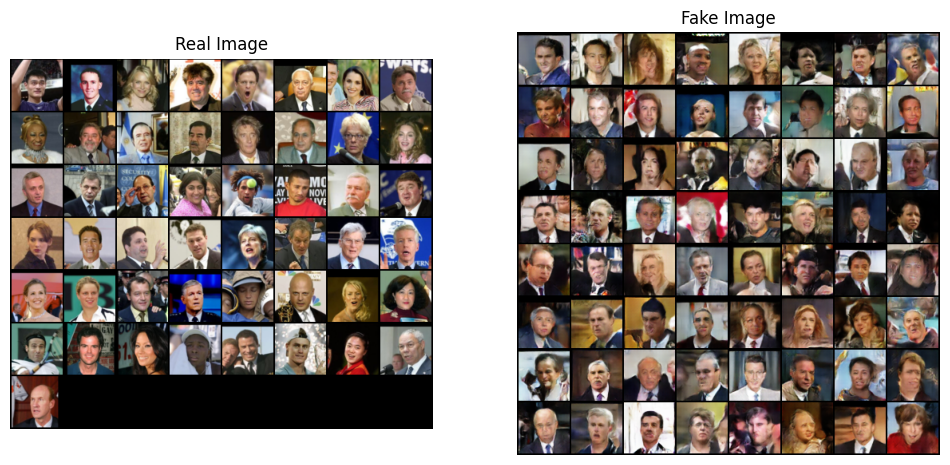

In [83]:
import matplotlib.pyplot as plt

# Create a subplot for displaying real and fake images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Real Image')
plt.imshow(real_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Fake Image')
plt.imshow(fake_image)
plt.axis('off')

plt.show()
